In [2]:
import numpy as np 
import pandas as pd 
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier, XGBRegressor, XGBModel,XGBRFRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
import pickle
np.random.seed(0)

<a id="2"></a>
<h1 style='background:#C2C4E2; border:0; color:black'><center>LOADING DATA</center></h1> 

# LOADING DATA

In [3]:
data = pd.read_csv("./data/weatherAUS.csv")
data.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [5]:
data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [6]:
data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [7]:
data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [8]:
data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [9]:
WindDir3pm_num = [14, 15,  0,  7, 13, 10,  2,  1,  6, 11, 12,  9,  3,  8,  5,  4]
WindDir9am_num = [13,  6,  9,  1, 12, 10,  8,  4,  3, 11, 15,  2,  0,  7, 14,  5]
WindDir3pm_cat = ['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE','NE']
WindDir9am_cat = ['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE','SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']

In [10]:
data_WindDir3pm = {}
data_WindDir3pm["Numbers"] = WindDir3pm_num
data_WindDir3pm["WindDir3pm"] = WindDir3pm_cat
data_WindDir3pm = pd.DataFrame(data_WindDir3pm)

data_WindDir9am = {}
data_WindDir9am["Numbers"] = WindDir9am_num
data_WindDir9am["WindDir9am"] = WindDir9am_cat
data_WindDir9am = pd.DataFrame(data_WindDir9am)

In [11]:
data_WindDir9am

,Numbers,WindDir9am
0,13,W
1,6,NNW
2,9,SE
3,1,ENE
4,12,SW
5,10,SSE
6,8,S
7,4,NE
8,3,SSW
9,11,N


In [12]:
print("The lenght of the input values is ",len(data.columns))
data.columns

The lenght of the input values is  23


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**About the data:**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations. 

In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not. 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Points to notice:**

* There are missing values in the dataset
* Dataset includes numeric and categorical values 

<a id="3"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA VISUALIZATION AND CLEANING</center></h2> 
 
# DATA VISUALIZATION AND CLEANING

**Steps involves in this section:**

* Count plot of target column 
* Correlation amongst numeric attributes
* Parse Dates into datetime
* Encoding days and months as continuous cyclic features


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

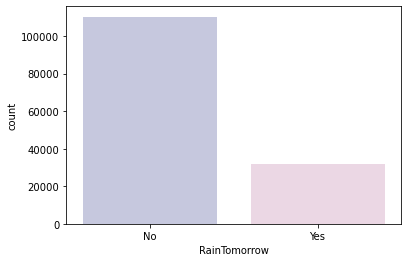

In [14]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

In [15]:
print(data.RainTomorrow.value_counts())
total_counts = (data.RainTomorrow.value_counts()[0]+data.RainTomorrow.value_counts()[1])
print("percentage of No is ",(data.RainTomorrow.value_counts()[0]/total_counts)*100)
print("percentage of Yes is ",(data.RainTomorrow.value_counts()[1]/total_counts)*100)

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64
percentage of No is  77.58187815152645
percentage of Yes is  22.418121848473554


C:\Users\nkuahe\AppData\Local\Temp\ipykernel_26176\2881990224.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<AxesSubplot:>

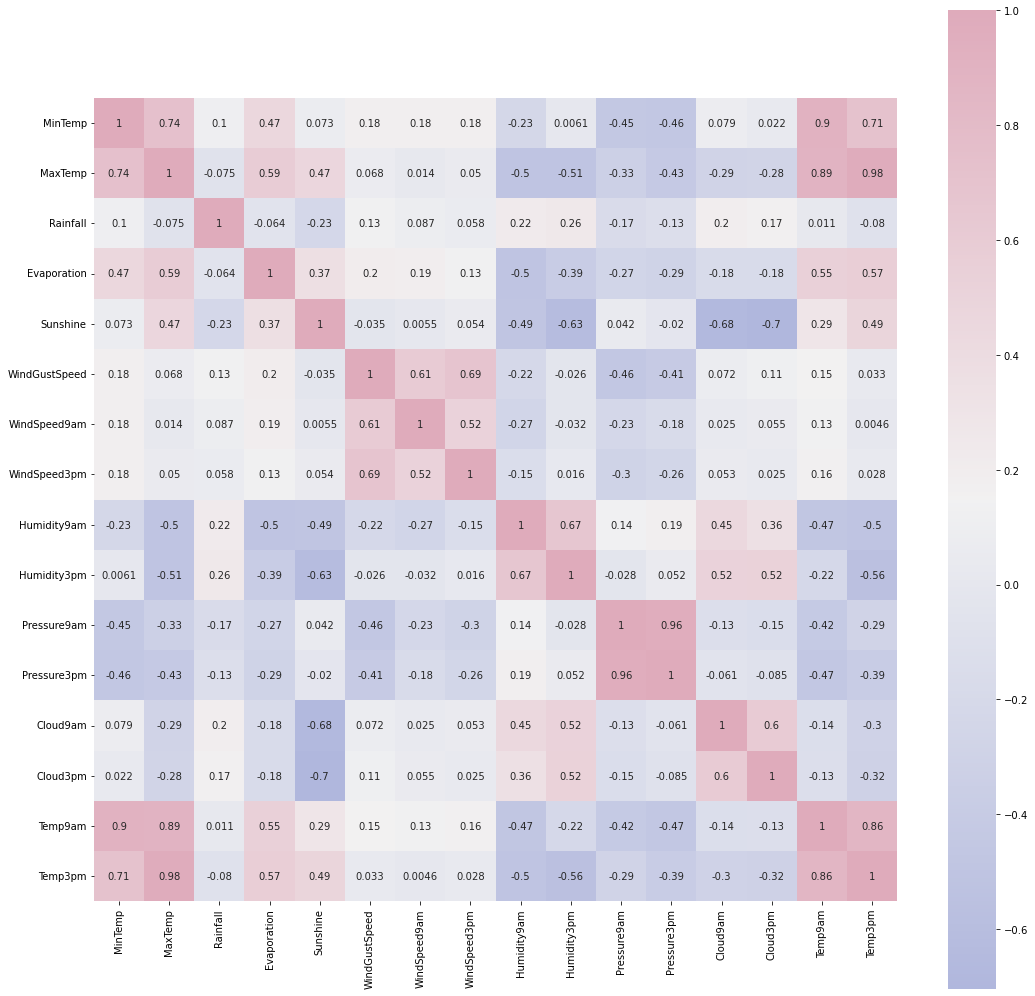

In [16]:
# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

**Now I will parse Dates into datetime.**

My goal is to build an artificial neural network(ANN). I will encode dates appropriately, i.e. I prefer the months and days in a cyclic continuous feature. As, date and time are inherently cyclical. To let the ANN model know that a feature is cyclical I split it into periodic subsections. Namely, years, months and days. Now for each subsection, I create two new features, deriving a sine transform and cosine transform of the subsection feature. 

In [17]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [18]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

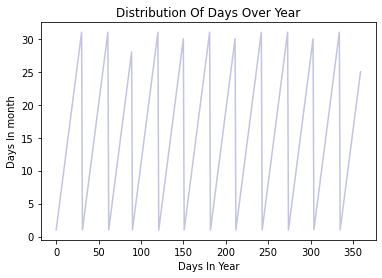

In [19]:
# roughly a year's span section 
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

As expected, the "year" attribute of data repeats. However in this for the true cyclic nature is not presented in a continuous manner. Splitting months and days into Sine and cosine combination provides the cyclical continuous feature. This can be used as input features to ANN. 

Text(0.5, 0, 'Sine Encoded Months')

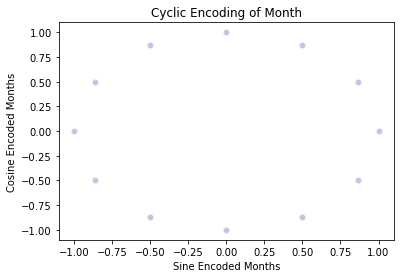

In [20]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

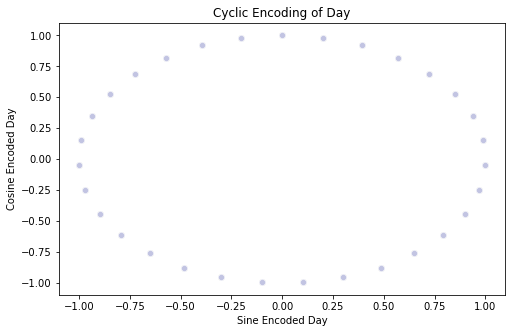

In [21]:
plt.figure(figsize=(8,5))
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

Next, I will deal with missing values in categorical and numeric attributes separately

**Categorical variables**

* Filling missing values with mode of the column value

In [22]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [24]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

**Numerical variables**

* Filling missing values with median of the column value

In [25]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [26]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [27]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

Text(0.5, 0, 'Years')

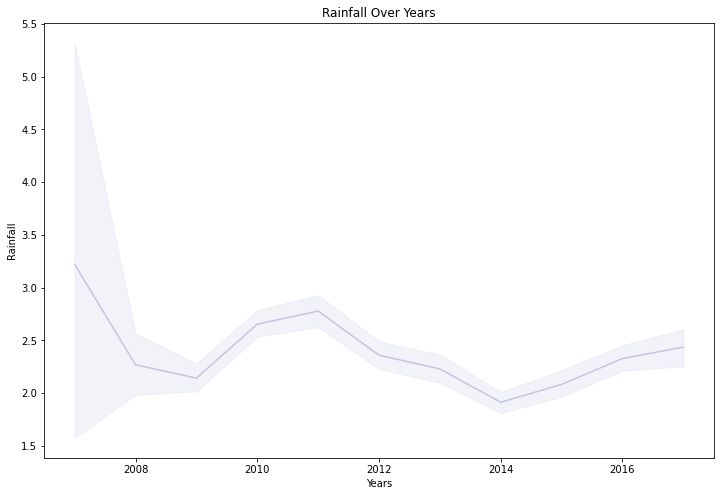

In [28]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

Text(0.5, 0, 'Year')

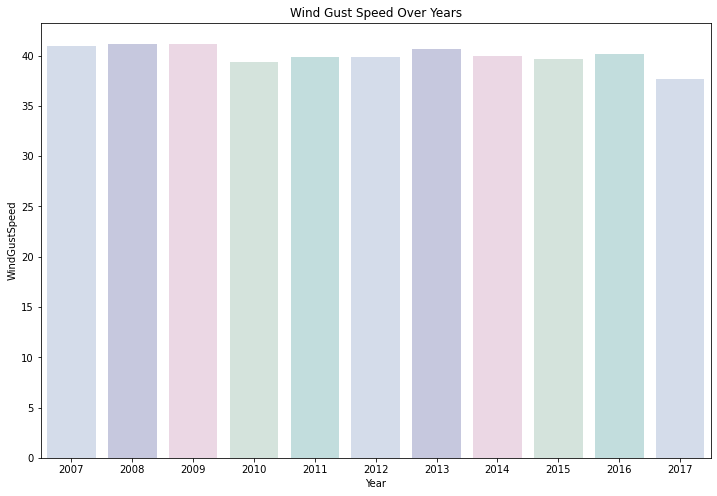

In [29]:
#Evauating Wind gust speed over years
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")

<a id="4"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA PREPROCESSING</center></h2> 
 
# DATA PREPROCESSING

**Steps involved in Data Preprocessing:**

* Label encoding columns with categorical data
* Perform the scaling of the features
* Detecting outliers
* Dropping the outliers based on data analysis

**Label encoding the catagorical variable**

# GET VALUES FOR TESTING

In [30]:
location = pd.DataFrame(data["Location"].value_counts())
location.reset_index()
WindGustDir = pd.DataFrame(data["WindGustDir"].value_counts())
WindDir9am = pd.DataFrame(data["WindDir9am"].value_counts())
RainToday = pd.DataFrame(data["RainToday"].value_counts())
WindDir3pm = pd.DataFrame(data["WindDir3pm"].value_counts())
RainTomorrow = pd.DataFrame(data["RainTomorrow"].value_counts())

In [31]:
WindGustDir.head()

,WindGustDir
W,20241
SE,9418
N,9313
SSE,9216
E,9181


In [32]:
location = location.reset_index()
location.head()

,index,Location
0,Canberra,3436
1,Sydney,3344
2,Darwin,3193
3,Melbourne,3193
4,Brisbane,3193


In [33]:
location = location.rename({"index":"Cities","Location":"Times"},axis=1)
location.head()

,Cities,Times
0,Canberra,3436
1,Sydney,3344
2,Darwin,3193
3,Melbourne,3193
4,Brisbane,3193


In [34]:
RainToday = RainToday.reset_index()
RainToday

,index,RainToday
0,No,113580
1,Yes,31880


In [35]:
RainToday

,index,RainToday
0,No,113580
1,Yes,31880


In [36]:
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [37]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
decode = pd.DataFrame()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [38]:
location1 = pd.DataFrame(data.Location.value_counts())
location1 = location1.reset_index()
location1 = location1.rename({"index":"Number","Location":"Times"},axis=1)
location1.head()

,Number,Times
0,9,3436
1,37,3344
2,13,3193
3,18,3193
4,7,3193


In [39]:
location.shape, location1.shape

((49, 2), (49, 2))

In [40]:
location1[['Cities','Times2']] = location[['Cities','Times']]
location1.head()

,Number,Times,Cities,Times2
0,9,3436,Canberra,3436
1,37,3344,Sydney,3344
2,13,3193,Darwin,3193
3,18,3193,Melbourne,3193
4,7,3193,Brisbane,3193


In [41]:
location1= location1.sort_values("Number")
location1

,Number,Times,Cities,Times2
5,0,3193,Adelaide,3193
8,1,3040,Albany,3040
17,2,3040,Albury,3040
15,3,3040,AliceSprings,3040
32,4,3009,BadgerysCreek,3009
10,5,3040,Ballarat,3040
16,6,3040,Bendigo,3040
4,7,3193,Brisbane,3193
13,8,3040,Cairns,3040
0,9,3436,Canberra,3436


In [42]:
city = list(location1.Cities)
city_no = list(location1.Number)
cities_numbers = {}
cities_numbers["City"]=city
cities_numbers["Numbers"] = city_no
data_cities = pd.DataFrame(cities_numbers)
print(city)
print(city_no)

['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [43]:
data_cities.head()

,City,Numbers
0,Adelaide,0
1,Albany,1
2,Albury,2
3,AliceSprings,3
4,BadgerysCreek,4


In [44]:
book = 'Albury'
city_ = data_cities.loc[data_cities["City"]==book,"Numbers"]
city_

2    2
Name: Numbers, dtype: int64

In [45]:
city = 'Bendigo'
if city in location1["Cities"].values:
    number = location1.loc[location1["Cities"]==city,"Number"]
number

16    6
Name: Number, dtype: int64

In [46]:
WindGustDir1 = pd.DataFrame(data["WindGustDir"].value_counts())
WindGustDir1 = WindGustDir1.reset_index()
WindGustDir1 = WindGustDir1.rename({"index":"Number","WindGustDir":"Times"},axis=1)

WindGustDir = WindGustDir.reset_index()
WindGustDir = WindGustDir.rename({"index":"WindGustDir","WindGustDir":"Times"},axis=1)
WindGustDir1[["WindGustDir","Times2"]] = WindGustDir[["WindGustDir","Times"]]
WindGustDir1 = WindGustDir1.sort_values("Number")

WindGustDir1

,Number,Times,WindGustDir,Times2
4,0,9181,E,9181
11,1,8104,ENE,8104
12,2,7372,ESE,7372
2,3,9313,N,9313
13,4,7133,NE,7133
15,5,6548,NNE,6548
14,6,6620,NNW,6620
10,7,8122,NW,8122
5,8,9168,S,9168
1,9,9418,SE,9418


In [47]:
WindGustDir1.Number.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [48]:
number_wind = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]
WindGustDir_list = ['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW']
WindGustDir_data = {}
WindGustDir_data["Number"] = number_wind
WindGustDir_data["WindGustDir"] = WindGustDir_list
data_WindGustDir = pd.DataFrame(WindGustDir_data)
data_WindGustDir

,Number,WindGustDir
0,0,E
1,1,ENE
2,2,ESE
3,3,N
4,4,NE
5,5,NNE
6,6,NNW
7,7,NW
8,8,S
9,9,SE


In [49]:
data.WindDir9am.unique()

array([13,  6,  9,  1, 12, 10,  8,  4,  3, 11, 15,  2,  0,  7, 14,  5])

In [50]:
#### Rough work

In [51]:
rough = {
    "date_of_birth": "1965-12-12",
    "requested_facility": "12000",
    "remaining_affordability": "400",
    "grr": "27",
    "tenor": "48",
    "net_salary": "2000"
}
rough_pd = pd.DataFrame(rough,index=[0])

In [52]:
rough_pd

,date_of_birth,requested_facility,remaining_affordability,grr,tenor,net_salary
0,1965-12-12,12000,400,27,48,2000


# Scaling the dataset

In [53]:
# Prepairing attributes of scale data
### Independent variables
features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns
features_temp9am = data.drop(['RainTomorrow',"Temp9am", 'Date','day', 'month'], axis=1) # dropping target and extra columns
features_temp3pm = data.drop(['RainTomorrow',"Temp3pm", 'Date','day', 'month'], axis=1) # dropping target and extra columns
features_Cloud9am = data.drop(['RainTomorrow',"Cloud9am", 'Date','day', 'month'], axis=1) # dropping target and extra columns
features_Cloud3pm = data.drop(['RainTomorrow',"Cloud3pm", 'Date','day', 'month'], axis=1) # dropping target and extra columns

### Dependent variables 
target = data['RainTomorrow']
target_temp9am = data['Temp9am']
target_temp3pm = data['Temp3pm']
target_Cloud9am = data['Cloud9am']
target_Cloud3pm = data['Cloud3pm']


s_scaler = preprocessing.StandardScaler()

#Set up a standard scaler for the features
col_names = list(features.columns)
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

#Set up a standard scaler for the features_temp9am
col_names_temp9am = list(features_temp9am.columns)
features_temp9am = s_scaler.fit_transform(features_temp9am)
features_temp9am = pd.DataFrame(features_temp9am, columns=col_names_temp9am) 

#Set up a standard scaler for the features_temp3pm
col_names_temp3pm = list(features_temp3pm.columns)
features_temp3pm = s_scaler.fit_transform(features_temp3pm)
features_temp3pm = pd.DataFrame(features_temp3pm, columns=col_names_temp3pm) 

#Set up a standard scaler for the features_Cloud9am
col_names_Cloud9am= list(features_Cloud9am.columns)
features_Cloud9am = s_scaler.fit_transform(features_Cloud9am)
features_Cloud9am = pd.DataFrame(features_Cloud9am, columns=col_names_Cloud9am) 

#Set up a standard scaler for the features_Cloud3pm
col_names_Cloud3pm = list(features_Cloud3pm.columns)
features_Cloud3pm = s_scaler.fit_transform(features_Cloud3pm)
features_Cloud3pm = pd.DataFrame(features_Cloud3pm, columns=col_names_Cloud3pm) 
#features.describe().T

C:\Users\nkuahe\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


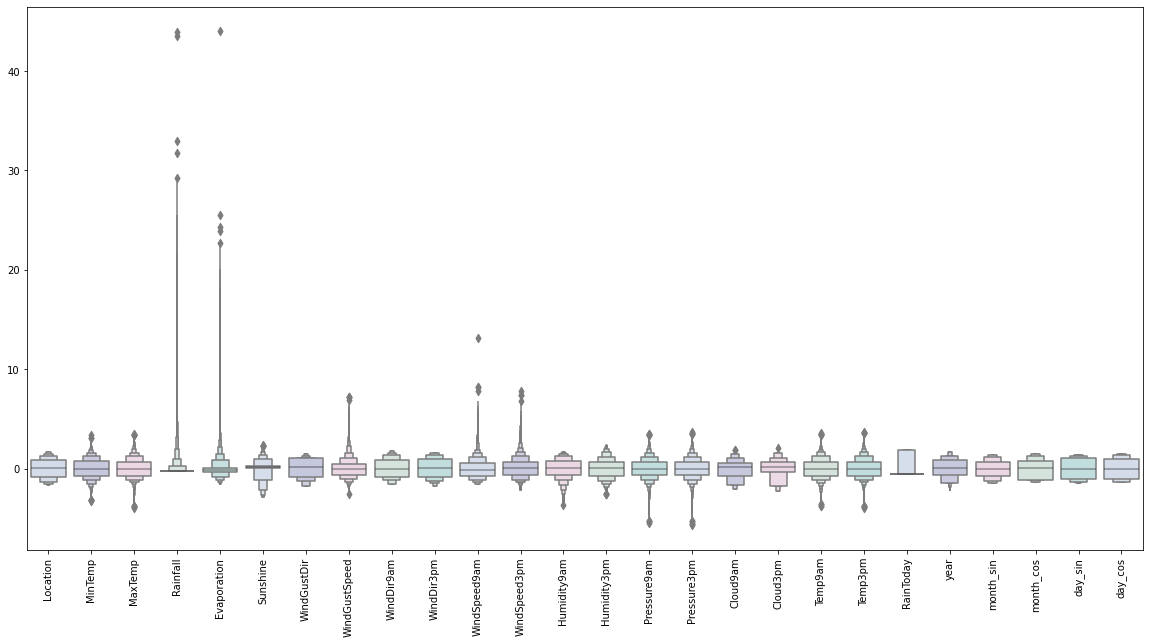

In [54]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [55]:
#full data for 
features["RainTomorrow"] = target
features_temp9am["Temp9am"] = target_temp9am
features_temp3pm["Temp3pm"] = target_temp3pm
features_Cloud9am["Cloud9am"] = target_Cloud9am
features_Cloud3pm["Cloud3pm"] = target_Cloud3pm

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 27)

In [56]:
features_temp9am = features_temp9am[(features_temp9am["MinTemp"]<2.3)&(features_temp9am["MinTemp"]>-2.3)]
features_temp9am = features_temp9am[(features_temp9am["MaxTemp"]<2.3)&(features_temp9am["MaxTemp"]>-2)]
features_temp9am = features_temp9am[(features_temp9am["Rainfall"]<4.5)]
features_temp9am = features_temp9am[(features_temp9am["Evaporation"]<2.8)]
features_temp9am = features_temp9am[(features_temp9am["Sunshine"]<2.1)]
features_temp9am = features_temp9am[(features_temp9am["WindGustSpeed"]<4)&(features_temp9am["WindGustSpeed"]>-4)]
features_temp9am = features_temp9am[(features_temp9am["WindSpeed9am"]<4)]
features_temp9am = features_temp9am[(features_temp9am["WindSpeed3pm"]<2.5)]
features_temp9am = features_temp9am[(features_temp9am["Humidity9am"]>-3)]
features_temp9am = features_temp9am[(features_temp9am["Humidity3pm"]>-2.2)]
features_temp9am = features_temp9am[(features_temp9am["Pressure9am"]< 2)&(features_temp9am["Pressure9am"]>-2.7)]
features_temp9am = features_temp9am[(features_temp9am["Pressure3pm"]< 2)&(features_temp9am["Pressure3pm"]>-2.7)]
features_temp9am = features_temp9am[(features_temp9am["Cloud9am"]<1.8)]
features_temp9am = features_temp9am[(features_temp9am["Cloud3pm"]<2)]
#features_temp9am = features_temp9am[(features_temp9am["Temp9am"]<2.3)&(features_temp9am["Temp9am"]>-2)]
features_temp9am = features_temp9am[(features_temp9am["Temp3pm"]<2.3)&(features_temp9am["Temp3pm"]>-2)]

In [57]:
features_temp3pm = features_temp3pm[(features_temp3pm["MinTemp"]<2.3)&(features_temp3pm["MinTemp"]>-2.3)]
features_temp3pm = features_temp3pm[(features_temp3pm["MaxTemp"]<2.3)&(features_temp3pm["MaxTemp"]>-2)]
features_temp3pm = features_temp3pm[(features_temp3pm["Rainfall"]<4.5)]
features_temp3pm = features_temp3pm[(features_temp3pm["Evaporation"]<2.8)]
features_temp3pm = features_temp3pm[(features_temp3pm["Sunshine"]<2.1)]
features_temp3pm = features_temp3pm[(features_temp3pm["WindGustSpeed"]<4)&(features_temp3pm["WindGustSpeed"]>-4)]
features_temp3pm = features_temp3pm[(features_temp3pm["WindSpeed9am"]<4)]
features_temp3pm = features_temp3pm[(features_temp3pm["WindSpeed3pm"]<2.5)]
features_temp3pm = features_temp3pm[(features_temp3pm["Humidity9am"]>-3)]
features_temp3pm = features_temp3pm[(features_temp3pm["Humidity3pm"]>-2.2)]
features_temp3pm = features_temp3pm[(features_temp3pm["Pressure9am"]< 2)&(features_temp3pm["Pressure9am"]>-2.7)]
features_temp3pm = features_temp3pm[(features_temp3pm["Pressure3pm"]< 2)&(features_temp3pm["Pressure3pm"]>-2.7)]
features_temp3pm = features_temp3pm[(features_temp3pm["Cloud9am"]<1.8)]
features_temp3pm = features_temp3pm[(features_temp3pm["Cloud3pm"]<2)]
features_temp3pm = features_temp3pm[(features_temp3pm["Temp9am"]<2.3)&(features_temp3pm["Temp9am"]>-2)]
#features_temp3pm = features_temp3pm[(features_temp3pm["Temp3pm"]<2.3)&(features_temp3pm["Temp3pm"]>-2)]

In [58]:
features_Cloud9am = features_Cloud9am[(features_Cloud9am["MinTemp"]<2.3)&(features_Cloud9am["MinTemp"]>-2.3)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["MaxTemp"]<2.3)&(features_Cloud9am["MaxTemp"]>-2)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Rainfall"]<4.5)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Evaporation"]<2.8)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Sunshine"]<2.1)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["WindGustSpeed"]<4)&(features_Cloud9am["WindGustSpeed"]>-4)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["WindSpeed9am"]<4)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["WindSpeed3pm"]<2.5)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Humidity9am"]>-3)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Humidity3pm"]>-2.2)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Pressure9am"]< 2)&(features_Cloud9am["Pressure9am"]>-2.7)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Pressure3pm"]< 2)&(features_Cloud9am["Pressure3pm"]>-2.7)]
#features_Cloud9am = features_Cloud9am[(features_Cloud9am["Cloud9am"]<1.8)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Cloud3pm"]<2)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Temp9am"]<2.3)&(features_Cloud9am["Temp9am"]>-2)]
features_Cloud9am = features_Cloud9am[(features_Cloud9am["Temp3pm"]<2.3)&(features_Cloud9am["Temp3pm"]>-2)]

In [59]:
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["MinTemp"]<2.3)&(features_Cloud3pm["MinTemp"]>-2.3)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["MaxTemp"]<2.3)&(features_Cloud3pm["MaxTemp"]>-2)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Rainfall"]<4.5)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Evaporation"]<2.8)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Sunshine"]<2.1)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["WindGustSpeed"]<4)&(features_Cloud3pm["WindGustSpeed"]>-4)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["WindSpeed9am"]<4)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["WindSpeed3pm"]<2.5)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Humidity9am"]>-3)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Humidity3pm"]>-2.2)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Pressure9am"]< 2)&(features_Cloud3pm["Pressure9am"]>-2.7)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Pressure3pm"]< 2)&(features_Cloud3pm["Pressure3pm"]>-2.7)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Cloud9am"]<1.8)]
#features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Cloud3pm"]<2)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Temp9am"]<2.3)&(features_Cloud3pm["Temp9am"]>-2)]
features_Cloud3pm = features_Cloud3pm[(features_Cloud3pm["Temp3pm"]<2.3)&(features_Cloud3pm["Temp3pm"]>-2)]

C:\Users\nkuahe\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


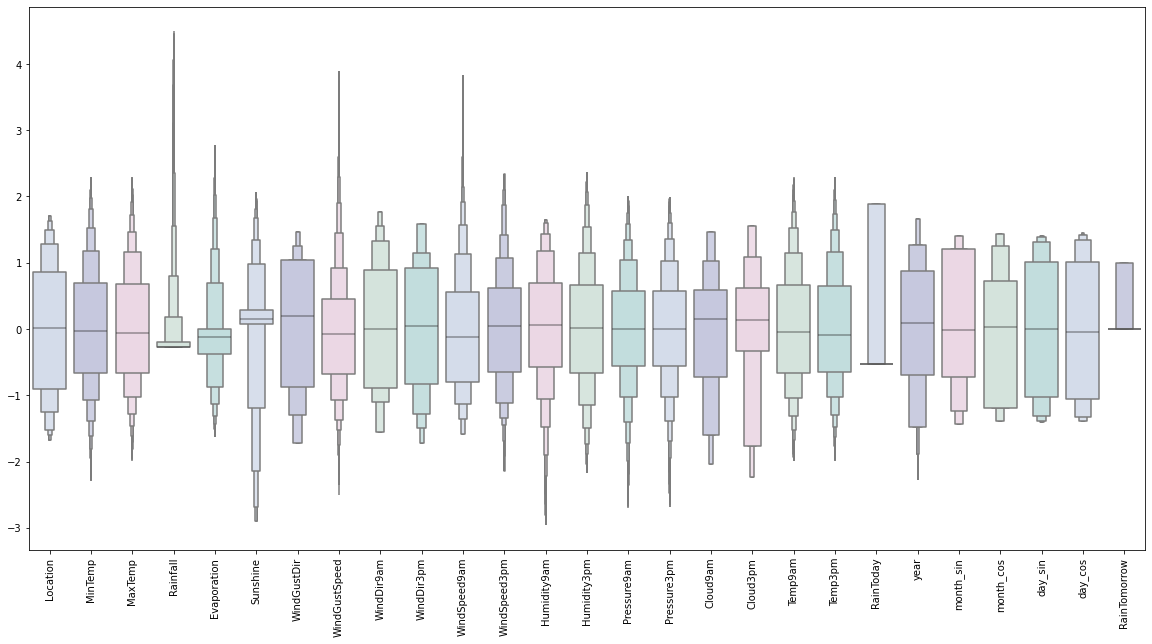

In [60]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Looks Good. Up next is building artificial neural network.

<a id="5"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>MODEL BUILDING</center></h2> 
 
# MODEL BUILDING


**In this project, we build an artificial neural network.**

**Following steps are involved in the model building**

* Assigning X and y the status of attributes and tags
* Splitting test and training sets
* Initialising the neural network
* Defining by adding layers
* Compiling the neural network
* Train the neural network

In [61]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]
X_t9 = features_temp9am.drop(["Temp9am"],axis=1)
y_t9 = features_temp9am["Temp9am"]
X_t3 = features_temp3pm.drop(["Temp3pm"],axis=1)
y_t3 = features_temp3pm["Temp3pm"]
X_c9 = features_Cloud9am.drop(["Cloud9am"],axis=1)
y_c9 = features_Cloud9am["Cloud9am"]
X_c3 = features_Cloud3pm.drop(["Cloud3pm"],axis=1)
y_c3 = features_Cloud3pm["Cloud3pm"]

print("Cloud3pm lenght",len(X_c3.columns),"c9 is ",len(X_c3.columns),"t9 is",len(X_t9.columns),"t3 is",len(X_t3.columns) )


# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
 
# Splitting test and training sets
X_train_t9, X_test_t9, y_train_t9, y_test_t9 = train_test_split(X_t9,y_t9, test_size = 0.2, random_state = 42)
# Splitting test and training sets
X_train_t3, X_test_t3, y_train_t3, y_test_t3 = train_test_split(X_t3, y_t3, test_size = 0.2, random_state = 42)
# Splitting test and training sets
X_train_c9, X_test_c9, y_train_c9, y_test_c9 = train_test_split(X_c9, y_c9, test_size = 0.2, random_state = 42)
# Splitting test and training sets
X_train_c3, X_test_c3, y_train_c3, y_test_c3 = train_test_split(X_c3, y_c3, test_size = 0.2, random_state = 42)

#X.shape

Cloud3pm lenght 25 c9 is  25 t9 is 25 t3 is 25


# Using XGBOOST

In [62]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,y_train)
predicted = xgbc.predict(X_test)
print ("The accuracy of XGBOOST is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of XGBOOST is :  85.84365689195546 %

F1 score for XGBoost is : 61.60552897395003 %


In [63]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     20110
           1       0.72      0.54      0.62      5398

    accuracy                           0.86     25508
   macro avg       0.80      0.74      0.76     25508
weighted avg       0.85      0.86      0.85     25508



<AxesSubplot:>

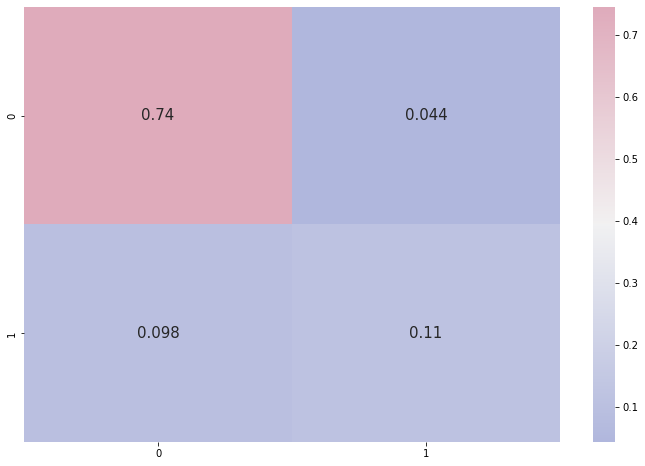

In [64]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

## Save model

In [65]:
# save the model to disk
filename = 'models/xgb_model.sav'
pickle.dump(xgbc, open(filename, 'wb'))
#load the model from disk
xgb_model = pickle.load(open(filename, 'rb'))
result = xgb_model.score(X_test, y_test)
print(result)

0.8584365689195547


# Adaboost

In [66]:
adabc = AdaBoostClassifier()
adabc.fit(X_train,y_train)
predicted = adabc.predict(X_test)
print ("The accuracy of XGBOOST is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of XGBOOST is :  84.45193664732633 %

F1 score for XGBoost is : 55.884315906562854 %


In [100]:
### Regression model
xgbr = XGBRegressor()
model_t9 = xgbr.fit(X_train_t9,y_train_t9)
print("*************************Temp 9am Done***********************************************")

*************************Temp 9am Done***********************************************


In [101]:
catr = CatBoostRegressor()
model_t3 = catr.fit(X_train_t3,y_train_t3)
print("*************************Temp 3pm Done**********************************************")

Learning rate set to 0.085096


C:\Users\nkuahe\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


0:	learn: 5.7402176	total: 168ms	remaining: 2m 47s
1:	learn: 5.3071388	total: 188ms	remaining: 1m 34s
2:	learn: 4.9113049	total: 203ms	remaining: 1m 7s
3:	learn: 4.5540863	total: 225ms	remaining: 56s
4:	learn: 4.2297741	total: 243ms	remaining: 48.4s
5:	learn: 3.9313722	total: 261ms	remaining: 43.2s
6:	learn: 3.6591756	total: 283ms	remaining: 40.1s
7:	learn: 3.4110415	total: 301ms	remaining: 37.4s
8:	learn: 3.1962359	total: 321ms	remaining: 35.3s
9:	learn: 2.9956642	total: 339ms	remaining: 33.5s
10:	learn: 2.8125658	total: 353ms	remaining: 31.8s
11:	learn: 2.6440893	total: 373ms	remaining: 30.7s
12:	learn: 2.4871634	total: 395ms	remaining: 30s
13:	learn: 2.3532072	total: 411ms	remaining: 29s
14:	learn: 2.2298224	total: 428ms	remaining: 28.1s
15:	learn: 2.1219165	total: 445ms	remaining: 27.3s
16:	learn: 2.0222535	total: 459ms	remaining: 26.6s
17:	learn: 1.9290191	total: 475ms	remaining: 25.9s
18:	learn: 1.8504046	total: 490ms	remaining: 25.3s
19:	learn: 1.7804460	total: 501ms	remaining: 

166:	learn: 0.9508605	total: 2.56s	remaining: 12.8s
167:	learn: 0.9491094	total: 2.58s	remaining: 12.8s
168:	learn: 0.9483427	total: 2.59s	remaining: 12.7s
169:	learn: 0.9477915	total: 2.61s	remaining: 12.7s
170:	learn: 0.9472796	total: 2.62s	remaining: 12.7s
171:	learn: 0.9468782	total: 2.63s	remaining: 12.7s
172:	learn: 0.9461908	total: 2.65s	remaining: 12.7s
173:	learn: 0.9438780	total: 2.66s	remaining: 12.6s
174:	learn: 0.9430995	total: 2.67s	remaining: 12.6s
175:	learn: 0.9423597	total: 2.68s	remaining: 12.6s
176:	learn: 0.9411615	total: 2.7s	remaining: 12.5s
177:	learn: 0.9404379	total: 2.71s	remaining: 12.5s
178:	learn: 0.9399355	total: 2.72s	remaining: 12.5s
179:	learn: 0.9394189	total: 2.73s	remaining: 12.4s
180:	learn: 0.9386636	total: 2.74s	remaining: 12.4s
181:	learn: 0.9381948	total: 2.76s	remaining: 12.4s
182:	learn: 0.9375767	total: 2.77s	remaining: 12.4s
183:	learn: 0.9370326	total: 2.78s	remaining: 12.3s
184:	learn: 0.9361984	total: 2.79s	remaining: 12.3s
185:	learn: 0

333:	learn: 0.8637217	total: 4.72s	remaining: 9.42s
334:	learn: 0.8633649	total: 4.74s	remaining: 9.41s
335:	learn: 0.8629823	total: 4.75s	remaining: 9.4s
336:	learn: 0.8626229	total: 4.77s	remaining: 9.38s
337:	learn: 0.8624322	total: 4.78s	remaining: 9.37s
338:	learn: 0.8620915	total: 4.79s	remaining: 9.35s
339:	learn: 0.8617319	total: 4.81s	remaining: 9.34s
340:	learn: 0.8615187	total: 4.82s	remaining: 9.32s
341:	learn: 0.8609020	total: 4.84s	remaining: 9.31s
342:	learn: 0.8607116	total: 4.85s	remaining: 9.29s
343:	learn: 0.8603637	total: 4.87s	remaining: 9.28s
344:	learn: 0.8602132	total: 4.88s	remaining: 9.26s
345:	learn: 0.8600547	total: 4.89s	remaining: 9.25s
346:	learn: 0.8597786	total: 4.91s	remaining: 9.23s
347:	learn: 0.8594720	total: 4.92s	remaining: 9.22s
348:	learn: 0.8592365	total: 4.93s	remaining: 9.2s
349:	learn: 0.8590271	total: 4.95s	remaining: 9.19s
350:	learn: 0.8588234	total: 4.96s	remaining: 9.17s
351:	learn: 0.8585361	total: 4.97s	remaining: 9.15s
352:	learn: 0.

492:	learn: 0.8212812	total: 6.9s	remaining: 7.09s
493:	learn: 0.8211008	total: 6.91s	remaining: 7.08s
494:	learn: 0.8209053	total: 6.92s	remaining: 7.06s
495:	learn: 0.8207526	total: 6.93s	remaining: 7.04s
496:	learn: 0.8205146	total: 6.95s	remaining: 7.03s
497:	learn: 0.8201629	total: 6.96s	remaining: 7.02s
498:	learn: 0.8199889	total: 6.97s	remaining: 7s
499:	learn: 0.8195324	total: 6.99s	remaining: 6.99s
500:	learn: 0.8194608	total: 7s	remaining: 6.97s
501:	learn: 0.8192149	total: 7.01s	remaining: 6.96s
502:	learn: 0.8188889	total: 7.03s	remaining: 6.94s
503:	learn: 0.8187233	total: 7.04s	remaining: 6.92s
504:	learn: 0.8183671	total: 7.05s	remaining: 6.91s
505:	learn: 0.8181665	total: 7.06s	remaining: 6.89s
506:	learn: 0.8179879	total: 7.07s	remaining: 6.87s
507:	learn: 0.8176386	total: 7.08s	remaining: 6.86s
508:	learn: 0.8175126	total: 7.09s	remaining: 6.84s
509:	learn: 0.8172329	total: 7.1s	remaining: 6.82s
510:	learn: 0.8170688	total: 7.11s	remaining: 6.8s
511:	learn: 0.8168466

665:	learn: 0.7881627	total: 9s	remaining: 4.51s
666:	learn: 0.7877599	total: 9.02s	remaining: 4.5s
667:	learn: 0.7875590	total: 9.03s	remaining: 4.49s
668:	learn: 0.7874427	total: 9.04s	remaining: 4.47s
669:	learn: 0.7873283	total: 9.06s	remaining: 4.46s
670:	learn: 0.7872179	total: 9.06s	remaining: 4.45s
671:	learn: 0.7870532	total: 9.07s	remaining: 4.43s
672:	learn: 0.7859875	total: 9.09s	remaining: 4.41s
673:	learn: 0.7858461	total: 9.09s	remaining: 4.4s
674:	learn: 0.7856996	total: 9.1s	remaining: 4.38s
675:	learn: 0.7854941	total: 9.11s	remaining: 4.37s
676:	learn: 0.7851992	total: 9.12s	remaining: 4.35s
677:	learn: 0.7851205	total: 9.13s	remaining: 4.34s
678:	learn: 0.7849231	total: 9.14s	remaining: 4.32s
679:	learn: 0.7847589	total: 9.16s	remaining: 4.31s
680:	learn: 0.7846157	total: 9.17s	remaining: 4.29s
681:	learn: 0.7845075	total: 9.18s	remaining: 4.28s
682:	learn: 0.7843439	total: 9.19s	remaining: 4.26s
683:	learn: 0.7841420	total: 9.2s	remaining: 4.25s
684:	learn: 0.78405

828:	learn: 0.7642933	total: 11s	remaining: 2.26s
829:	learn: 0.7642131	total: 11s	remaining: 2.25s
830:	learn: 0.7641070	total: 11s	remaining: 2.24s
831:	learn: 0.7638874	total: 11s	remaining: 2.22s
832:	learn: 0.7638135	total: 11s	remaining: 2.21s
833:	learn: 0.7637405	total: 11s	remaining: 2.19s
834:	learn: 0.7636485	total: 11s	remaining: 2.18s
835:	learn: 0.7635758	total: 11s	remaining: 2.17s
836:	learn: 0.7634738	total: 11.1s	remaining: 2.15s
837:	learn: 0.7632825	total: 11.1s	remaining: 2.14s
838:	learn: 0.7631431	total: 11.1s	remaining: 2.13s
839:	learn: 0.7628370	total: 11.1s	remaining: 2.11s
840:	learn: 0.7623260	total: 11.1s	remaining: 2.1s
841:	learn: 0.7622324	total: 11.1s	remaining: 2.09s
842:	learn: 0.7621795	total: 11.1s	remaining: 2.07s
843:	learn: 0.7620719	total: 11.1s	remaining: 2.06s
844:	learn: 0.7617240	total: 11.2s	remaining: 2.05s
845:	learn: 0.7616389	total: 11.2s	remaining: 2.03s
846:	learn: 0.7615623	total: 11.2s	remaining: 2.02s
847:	learn: 0.7614999	total: 

994:	learn: 0.7450587	total: 13s	remaining: 65.1ms
995:	learn: 0.7449126	total: 13s	remaining: 52.1ms
996:	learn: 0.7447806	total: 13s	remaining: 39.1ms
997:	learn: 0.7446941	total: 13s	remaining: 26.1ms
998:	learn: 0.7446303	total: 13s	remaining: 13ms
999:	learn: 0.7445351	total: 13s	remaining: 0us
*************************Temp 3pm Done**********************************************


In [103]:
adab = AdaBoostRegressor()
model_c3 = adab.fit(X_train_c3,y_train_c3)
print("*************************Cloud 3pm Done**********************************************")

*************************Cloud 3pm Done**********************************************


In [102]:
light = LGBMRegressor()
model_c9 = light.fit(X_train_c9,y_train_c9)
print("*************************Cloud 9am Done*********************************************")

*************************Cloud 9am Done*********************************************


In [107]:
filename_rain = "./models/xgb_model.sav"
filename_t9am = "./models/xgb_t9_model.sav"
filename_t3pm = "./models/catr_t3_model.sav"
filename_c3pm = "./models/adabr_c3_model.sav"
filename_c9am = "./models/light_c9_model.sav"

In [108]:
# save the model to disk
#pickle.dump(rain, open(filename, 'wb'))
pickle.dump(model_t9, open(filename_t9am,"wb"))
pickle.dump(model_t3, open(filename_t3pm,"wb"))
pickle.dump(model_c3, open(filename_c3pm,"wb"))
pickle.dump(model_c9, open(filename_c9am,"wb"))

In [114]:
data_1 = data_1.astype(float)
Cloud9am_data = data_1.drop(["Cloud9am"],axis=1)
Cloud3pm_data = data_1.drop(["Cloud3pm"],axis=1)
Temp3pm_data = data_1.drop(["Temp3pm"],axis=1)
Temp9am_data = data_1.drop(["Temp9am"],axis=1)

In [115]:
## Load and predict model 
xgb_t9 = pickle.load(open(filename_t9am, 'rb'))
Temp9am = xgb_t9.predict(Temp9am_data)
Temp9am = round(Temp9am[0],2)
print("Temp at 9am is ", Temp9am)

cat_t3 = pickle.load(open(filename_t3pm, 'rb'))
Temp3pm = cat_t3.predict(Temp3pm_data)
Temp3pm = round(Temp3pm[0],2)
print("Temp at 3pm is ",Temp3pm)

### load and predict Cloud9am model
adab_c3 = pickle.load(open(filename_c3pm, 'rb'))
result = adab_c3.predict(Cloud3pm_data)
print("Cloud 3pm",round(result[0],2))
#result

light_c9 = pickle.load(open(filename_c9am, 'rb'))
Cloud9am = light_c9.predict(Cloud9am_data)
Cloud9am = round(Cloud9am[0],2)
print("Cloud9am is ",Cloud9am)

Temp at 9am is  20.61
Temp at 3pm is  29.01
Cloud 3pm 4.0
Cloud9am is  3.91


C:\Users\nkuahe\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


# Catboost

In [67]:
catb = CatBoostClassifier()
rain = catb.fit(X_train,y_train)
print("RainTomorrow model done!!!")
predicted = rain.predict(X_test)
print("The accuracy of CATBOOST is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for CATBOOST is :",f1_score(y_test, predicted,)*100, "%")

C:\Users\nkuahe\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


Learning rate set to 0.074243
0:	learn: 0.6409755	total: 164ms	remaining: 2m 43s
1:	learn: 0.5956334	total: 181ms	remaining: 1m 30s
2:	learn: 0.5583454	total: 200ms	remaining: 1m 6s
3:	learn: 0.5274606	total: 216ms	remaining: 53.8s
4:	learn: 0.5029377	total: 232ms	remaining: 46.1s
5:	learn: 0.4824582	total: 245ms	remaining: 40.6s
6:	learn: 0.4661431	total: 259ms	remaining: 36.7s
7:	learn: 0.4511568	total: 271ms	remaining: 33.6s
8:	learn: 0.4396325	total: 284ms	remaining: 31.3s
9:	learn: 0.4302614	total: 299ms	remaining: 29.6s
10:	learn: 0.4219039	total: 315ms	remaining: 28.3s
11:	learn: 0.4144142	total: 331ms	remaining: 27.2s
12:	learn: 0.4078976	total: 346ms	remaining: 26.3s
13:	learn: 0.4025880	total: 360ms	remaining: 25.4s
14:	learn: 0.3977245	total: 375ms	remaining: 24.6s
15:	learn: 0.3939780	total: 390ms	remaining: 24s
16:	learn: 0.3898203	total: 411ms	remaining: 23.8s
17:	learn: 0.3868950	total: 425ms	remaining: 23.2s
18:	learn: 0.3837180	total: 440ms	remaining: 22.7s
19:	learn: 

162:	learn: 0.3330488	total: 2.81s	remaining: 14.5s
163:	learn: 0.3329019	total: 2.83s	remaining: 14.4s
164:	learn: 0.3327812	total: 2.85s	remaining: 14.4s
165:	learn: 0.3326719	total: 2.87s	remaining: 14.4s
166:	learn: 0.3325539	total: 2.88s	remaining: 14.4s
167:	learn: 0.3323945	total: 2.9s	remaining: 14.3s
168:	learn: 0.3322663	total: 2.91s	remaining: 14.3s
169:	learn: 0.3320972	total: 2.92s	remaining: 14.3s
170:	learn: 0.3319237	total: 2.94s	remaining: 14.2s
171:	learn: 0.3318545	total: 2.95s	remaining: 14.2s
172:	learn: 0.3317238	total: 2.97s	remaining: 14.2s
173:	learn: 0.3315366	total: 2.98s	remaining: 14.2s
174:	learn: 0.3314186	total: 3s	remaining: 14.1s
175:	learn: 0.3312869	total: 3.01s	remaining: 14.1s
176:	learn: 0.3310991	total: 3.03s	remaining: 14.1s
177:	learn: 0.3309428	total: 3.04s	remaining: 14s
178:	learn: 0.3308264	total: 3.05s	remaining: 14s
179:	learn: 0.3307044	total: 3.06s	remaining: 14s
180:	learn: 0.3305625	total: 3.08s	remaining: 13.9s
181:	learn: 0.3304165	

334:	learn: 0.3141233	total: 5.43s	remaining: 10.8s
335:	learn: 0.3140233	total: 5.44s	remaining: 10.8s
336:	learn: 0.3139434	total: 5.46s	remaining: 10.7s
337:	learn: 0.3138828	total: 5.47s	remaining: 10.7s
338:	learn: 0.3137850	total: 5.49s	remaining: 10.7s
339:	learn: 0.3136957	total: 5.5s	remaining: 10.7s
340:	learn: 0.3136239	total: 5.52s	remaining: 10.7s
341:	learn: 0.3135560	total: 5.53s	remaining: 10.6s
342:	learn: 0.3134361	total: 5.55s	remaining: 10.6s
343:	learn: 0.3133217	total: 5.56s	remaining: 10.6s
344:	learn: 0.3132610	total: 5.58s	remaining: 10.6s
345:	learn: 0.3132026	total: 5.59s	remaining: 10.6s
346:	learn: 0.3130977	total: 5.61s	remaining: 10.6s
347:	learn: 0.3130107	total: 5.62s	remaining: 10.5s
348:	learn: 0.3128995	total: 5.64s	remaining: 10.5s
349:	learn: 0.3128326	total: 5.66s	remaining: 10.5s
350:	learn: 0.3127458	total: 5.67s	remaining: 10.5s
351:	learn: 0.3126345	total: 5.69s	remaining: 10.5s
352:	learn: 0.3125626	total: 5.71s	remaining: 10.5s
353:	learn: 0

497:	learn: 0.3012168	total: 8.04s	remaining: 8.11s
498:	learn: 0.3011432	total: 8.06s	remaining: 8.1s
499:	learn: 0.3010696	total: 8.08s	remaining: 8.08s
500:	learn: 0.3010138	total: 8.1s	remaining: 8.06s
501:	learn: 0.3009434	total: 8.11s	remaining: 8.04s
502:	learn: 0.3008618	total: 8.12s	remaining: 8.03s
503:	learn: 0.3007488	total: 8.14s	remaining: 8.02s
504:	learn: 0.3006711	total: 8.16s	remaining: 8s
505:	learn: 0.3005936	total: 8.18s	remaining: 7.99s
506:	learn: 0.3005307	total: 8.2s	remaining: 7.97s
507:	learn: 0.3004702	total: 8.21s	remaining: 7.96s
508:	learn: 0.3003875	total: 8.23s	remaining: 7.94s
509:	learn: 0.3003174	total: 8.25s	remaining: 7.92s
510:	learn: 0.3002332	total: 8.27s	remaining: 7.91s
511:	learn: 0.3001275	total: 8.28s	remaining: 7.89s
512:	learn: 0.3000590	total: 8.3s	remaining: 7.88s
513:	learn: 0.2999896	total: 8.31s	remaining: 7.86s
514:	learn: 0.2999157	total: 8.32s	remaining: 7.84s
515:	learn: 0.2998416	total: 8.34s	remaining: 7.82s
516:	learn: 0.29972

659:	learn: 0.2901928	total: 10.4s	remaining: 5.38s
660:	learn: 0.2901395	total: 10.5s	remaining: 5.36s
661:	learn: 0.2900720	total: 10.5s	remaining: 5.34s
662:	learn: 0.2900005	total: 10.5s	remaining: 5.33s
663:	learn: 0.2899467	total: 10.5s	remaining: 5.31s
664:	learn: 0.2898977	total: 10.5s	remaining: 5.3s
665:	learn: 0.2898669	total: 10.5s	remaining: 5.28s
666:	learn: 0.2898188	total: 10.5s	remaining: 5.26s
667:	learn: 0.2897476	total: 10.6s	remaining: 5.25s
668:	learn: 0.2896818	total: 10.6s	remaining: 5.23s
669:	learn: 0.2896111	total: 10.6s	remaining: 5.21s
670:	learn: 0.2895483	total: 10.6s	remaining: 5.2s
671:	learn: 0.2894844	total: 10.6s	remaining: 5.18s
672:	learn: 0.2894280	total: 10.6s	remaining: 5.16s
673:	learn: 0.2893676	total: 10.6s	remaining: 5.14s
674:	learn: 0.2892833	total: 10.6s	remaining: 5.13s
675:	learn: 0.2892129	total: 10.7s	remaining: 5.11s
676:	learn: 0.2891665	total: 10.7s	remaining: 5.09s
677:	learn: 0.2891113	total: 10.7s	remaining: 5.08s
678:	learn: 0.

818:	learn: 0.2807338	total: 13.1s	remaining: 2.89s
819:	learn: 0.2806848	total: 13.1s	remaining: 2.88s
820:	learn: 0.2806188	total: 13.1s	remaining: 2.86s
821:	learn: 0.2805736	total: 13.1s	remaining: 2.85s
822:	learn: 0.2805107	total: 13.2s	remaining: 2.83s
823:	learn: 0.2804530	total: 13.2s	remaining: 2.81s
824:	learn: 0.2803900	total: 13.2s	remaining: 2.79s
825:	learn: 0.2803345	total: 13.2s	remaining: 2.78s
826:	learn: 0.2802852	total: 13.2s	remaining: 2.76s
827:	learn: 0.2802404	total: 13.2s	remaining: 2.75s
828:	learn: 0.2801914	total: 13.2s	remaining: 2.73s
829:	learn: 0.2801264	total: 13.2s	remaining: 2.71s
830:	learn: 0.2800484	total: 13.3s	remaining: 2.7s
831:	learn: 0.2800084	total: 13.3s	remaining: 2.68s
832:	learn: 0.2799632	total: 13.3s	remaining: 2.66s
833:	learn: 0.2799120	total: 13.3s	remaining: 2.65s
834:	learn: 0.2798609	total: 13.3s	remaining: 2.63s
835:	learn: 0.2798140	total: 13.3s	remaining: 2.62s
836:	learn: 0.2797225	total: 13.3s	remaining: 2.6s
837:	learn: 0.

981:	learn: 0.2719596	total: 15.5s	remaining: 284ms
982:	learn: 0.2719054	total: 15.5s	remaining: 268ms
983:	learn: 0.2718526	total: 15.5s	remaining: 253ms
984:	learn: 0.2718084	total: 15.5s	remaining: 237ms
985:	learn: 0.2717539	total: 15.6s	remaining: 221ms
986:	learn: 0.2717116	total: 15.6s	remaining: 205ms
987:	learn: 0.2716483	total: 15.6s	remaining: 189ms
988:	learn: 0.2716008	total: 15.6s	remaining: 173ms
989:	learn: 0.2715437	total: 15.6s	remaining: 158ms
990:	learn: 0.2714763	total: 15.6s	remaining: 142ms
991:	learn: 0.2714044	total: 15.6s	remaining: 126ms
992:	learn: 0.2713503	total: 15.7s	remaining: 110ms
993:	learn: 0.2712994	total: 15.7s	remaining: 94.6ms
994:	learn: 0.2712216	total: 15.7s	remaining: 78.9ms
995:	learn: 0.2711688	total: 15.7s	remaining: 63.1ms
996:	learn: 0.2711159	total: 15.7s	remaining: 47.4ms
997:	learn: 0.2710991	total: 15.8s	remaining: 31.6ms
998:	learn: 0.2710267	total: 15.8s	remaining: 15.8ms
999:	learn: 0.2709842	total: 15.8s	remaining: 0us
RainTomo

# FEATURE IMPORTANCE

In [69]:
feature_importance = pd.DataFrame({'feature_importance': rain.get_feature_importance(), 
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

In [75]:
print("The sum of the feature importance is ",round(sum(feature_importance.feature_importance),2))
feature_importance

The sum of the feature importance is  100.0


,feature_importance,feature_names
13,16.545786,Humidity3pm
15,9.579989,Pressure3pm
5,7.326130,Sunshine
0,7.275210,Location
7,6.262011,WindGustSpeed
14,4.160956,Pressure9am
17,3.715870,Cloud3pm
9,3.682699,WindDir3pm
2,3.679310,MaxTemp
1,3.527868,MinTemp


In [67]:
### Regression model
catbr = CatBoostRegressor()
model_t9 = catbr.fit(X_train_t9,y_train_t9)
print("*************************Temp 9am Done***********************************************")

Learning rate set to 0.085133
0:	learn: 5.4962629	total: 18.6ms	remaining: 18.6s
1:	learn: 5.1096250	total: 35.9ms	remaining: 17.9s
2:	learn: 4.7594589	total: 50.1ms	remaining: 16.6s
3:	learn: 4.4421377	total: 64.7ms	remaining: 16.1s
4:	learn: 4.1525248	total: 80.9ms	remaining: 16.1s
5:	learn: 3.8878887	total: 94.9ms	remaining: 15.7s


C:\Users\nkuahe\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


6:	learn: 3.6439740	total: 113ms	remaining: 16.1s
7:	learn: 3.4277133	total: 128ms	remaining: 15.9s
8:	learn: 3.2323976	total: 142ms	remaining: 15.6s
9:	learn: 3.0555488	total: 154ms	remaining: 15.3s
10:	learn: 2.8942970	total: 164ms	remaining: 14.8s
11:	learn: 2.7490889	total: 175ms	remaining: 14.4s
12:	learn: 2.6175068	total: 187ms	remaining: 14.2s
13:	learn: 2.4979930	total: 197ms	remaining: 13.9s
14:	learn: 2.3931085	total: 207ms	remaining: 13.6s
15:	learn: 2.2938073	total: 217ms	remaining: 13.4s
16:	learn: 2.2079911	total: 227ms	remaining: 13.1s
17:	learn: 2.1290087	total: 239ms	remaining: 13s
18:	learn: 2.0597131	total: 250ms	remaining: 12.9s
19:	learn: 2.0006697	total: 263ms	remaining: 12.9s
20:	learn: 1.9451475	total: 273ms	remaining: 12.7s
21:	learn: 1.8954997	total: 282ms	remaining: 12.5s
22:	learn: 1.8510615	total: 294ms	remaining: 12.5s
23:	learn: 1.8087589	total: 303ms	remaining: 12.3s
24:	learn: 1.7717694	total: 316ms	remaining: 12.3s
25:	learn: 1.7385509	total: 326ms	rem

168:	learn: 1.2143135	total: 1.96s	remaining: 9.62s
169:	learn: 1.2134499	total: 1.97s	remaining: 9.6s
170:	learn: 1.2127556	total: 1.98s	remaining: 9.58s
171:	learn: 1.2117005	total: 1.98s	remaining: 9.55s
172:	learn: 1.2107818	total: 2s	remaining: 9.54s
173:	learn: 1.2100417	total: 2s	remaining: 9.51s
174:	learn: 1.2091576	total: 2.01s	remaining: 9.49s
175:	learn: 1.2084620	total: 2.02s	remaining: 9.46s
176:	learn: 1.2077183	total: 2.03s	remaining: 9.44s
177:	learn: 1.2071247	total: 2.04s	remaining: 9.42s
178:	learn: 1.2061832	total: 2.05s	remaining: 9.39s
179:	learn: 1.2056822	total: 2.06s	remaining: 9.37s
180:	learn: 1.2048836	total: 2.06s	remaining: 9.34s
181:	learn: 1.2039961	total: 2.08s	remaining: 9.33s
182:	learn: 1.2033390	total: 2.08s	remaining: 9.31s
183:	learn: 1.2025977	total: 2.09s	remaining: 9.29s
184:	learn: 1.2016426	total: 2.1s	remaining: 9.26s
185:	learn: 1.2007624	total: 2.11s	remaining: 9.24s
186:	learn: 1.2001549	total: 2.12s	remaining: 9.21s
187:	learn: 1.199133

330:	learn: 1.1205381	total: 3.63s	remaining: 7.33s
331:	learn: 1.1202113	total: 3.64s	remaining: 7.32s
332:	learn: 1.1195686	total: 3.65s	remaining: 7.31s
333:	learn: 1.1192215	total: 3.66s	remaining: 7.29s
334:	learn: 1.1189600	total: 3.67s	remaining: 7.28s
335:	learn: 1.1185197	total: 3.68s	remaining: 7.26s
336:	learn: 1.1181972	total: 3.7s	remaining: 7.28s
337:	learn: 1.1178890	total: 3.71s	remaining: 7.26s
338:	learn: 1.1172897	total: 3.72s	remaining: 7.25s
339:	learn: 1.1168437	total: 3.73s	remaining: 7.24s
340:	learn: 1.1164683	total: 3.74s	remaining: 7.22s
341:	learn: 1.1160426	total: 3.75s	remaining: 7.21s
342:	learn: 1.1157292	total: 3.76s	remaining: 7.2s
343:	learn: 1.1153206	total: 3.77s	remaining: 7.18s
344:	learn: 1.1148943	total: 3.78s	remaining: 7.17s
345:	learn: 1.1146156	total: 3.79s	remaining: 7.16s
346:	learn: 1.1143282	total: 3.8s	remaining: 7.15s
347:	learn: 1.1140375	total: 3.81s	remaining: 7.13s
348:	learn: 1.1137429	total: 3.82s	remaining: 7.12s
349:	learn: 1.1

490:	learn: 1.0698243	total: 5.38s	remaining: 5.58s
491:	learn: 1.0695306	total: 5.39s	remaining: 5.57s
492:	learn: 1.0692783	total: 5.4s	remaining: 5.56s
493:	learn: 1.0689578	total: 5.41s	remaining: 5.54s
494:	learn: 1.0687380	total: 5.42s	remaining: 5.53s
495:	learn: 1.0685159	total: 5.43s	remaining: 5.52s
496:	learn: 1.0683095	total: 5.44s	remaining: 5.5s
497:	learn: 1.0680557	total: 5.45s	remaining: 5.49s
498:	learn: 1.0677367	total: 5.46s	remaining: 5.48s
499:	learn: 1.0675521	total: 5.47s	remaining: 5.47s
500:	learn: 1.0672901	total: 5.48s	remaining: 5.45s
501:	learn: 1.0670032	total: 5.49s	remaining: 5.44s
502:	learn: 1.0668254	total: 5.49s	remaining: 5.43s
503:	learn: 1.0666063	total: 5.5s	remaining: 5.42s
504:	learn: 1.0663586	total: 5.51s	remaining: 5.41s
505:	learn: 1.0660660	total: 5.52s	remaining: 5.39s
506:	learn: 1.0657013	total: 5.53s	remaining: 5.38s
507:	learn: 1.0653803	total: 5.54s	remaining: 5.37s
508:	learn: 1.0650910	total: 5.55s	remaining: 5.36s
509:	learn: 1.0

650:	learn: 1.0338777	total: 7.16s	remaining: 3.84s
651:	learn: 1.0337505	total: 7.17s	remaining: 3.83s
652:	learn: 1.0335592	total: 7.18s	remaining: 3.82s
653:	learn: 1.0333623	total: 7.19s	remaining: 3.81s
654:	learn: 1.0332431	total: 7.2s	remaining: 3.79s
655:	learn: 1.0330523	total: 7.21s	remaining: 3.78s
656:	learn: 1.0327666	total: 7.22s	remaining: 3.77s
657:	learn: 1.0326192	total: 7.23s	remaining: 3.76s
658:	learn: 1.0324120	total: 7.24s	remaining: 3.75s
659:	learn: 1.0321691	total: 7.25s	remaining: 3.73s
660:	learn: 1.0319202	total: 7.26s	remaining: 3.72s
661:	learn: 1.0317304	total: 7.27s	remaining: 3.71s
662:	learn: 1.0316488	total: 7.28s	remaining: 3.7s
663:	learn: 1.0313269	total: 7.29s	remaining: 3.69s
664:	learn: 1.0311215	total: 7.3s	remaining: 3.68s
665:	learn: 1.0309476	total: 7.31s	remaining: 3.67s
666:	learn: 1.0307360	total: 7.32s	remaining: 3.65s
667:	learn: 1.0304868	total: 7.33s	remaining: 3.64s
668:	learn: 1.0303086	total: 7.34s	remaining: 3.63s
669:	learn: 1.0

819:	learn: 1.0038274	total: 8.95s	remaining: 1.96s
820:	learn: 1.0036223	total: 8.96s	remaining: 1.95s
821:	learn: 1.0034632	total: 8.97s	remaining: 1.94s
822:	learn: 1.0033989	total: 8.98s	remaining: 1.93s
823:	learn: 1.0033003	total: 8.98s	remaining: 1.92s
824:	learn: 1.0032086	total: 8.99s	remaining: 1.91s
825:	learn: 1.0030289	total: 9.01s	remaining: 1.9s
826:	learn: 1.0028057	total: 9.02s	remaining: 1.89s
827:	learn: 1.0026809	total: 9.02s	remaining: 1.87s
828:	learn: 1.0022827	total: 9.04s	remaining: 1.86s
829:	learn: 1.0020352	total: 9.05s	remaining: 1.85s
830:	learn: 1.0018618	total: 9.06s	remaining: 1.84s
831:	learn: 1.0017278	total: 9.07s	remaining: 1.83s
832:	learn: 1.0016000	total: 9.08s	remaining: 1.82s
833:	learn: 1.0014787	total: 9.09s	remaining: 1.81s
834:	learn: 1.0012865	total: 9.1s	remaining: 1.8s
835:	learn: 1.0011737	total: 9.11s	remaining: 1.79s
836:	learn: 1.0010122	total: 9.12s	remaining: 1.78s
837:	learn: 1.0008871	total: 9.13s	remaining: 1.76s
838:	learn: 1.0

979:	learn: 0.9802102	total: 10.7s	remaining: 219ms
980:	learn: 0.9800908	total: 10.7s	remaining: 208ms
981:	learn: 0.9798395	total: 10.7s	remaining: 197ms
982:	learn: 0.9797051	total: 10.7s	remaining: 186ms
983:	learn: 0.9795925	total: 10.7s	remaining: 175ms
984:	learn: 0.9795109	total: 10.8s	remaining: 164ms
985:	learn: 0.9793470	total: 10.8s	remaining: 153ms
986:	learn: 0.9791782	total: 10.8s	remaining: 142ms
987:	learn: 0.9790515	total: 10.8s	remaining: 131ms
988:	learn: 0.9789400	total: 10.8s	remaining: 120ms
989:	learn: 0.9788203	total: 10.8s	remaining: 109ms
990:	learn: 0.9787226	total: 10.8s	remaining: 98.3ms
991:	learn: 0.9786506	total: 10.8s	remaining: 87.3ms
992:	learn: 0.9785262	total: 10.8s	remaining: 76.4ms
993:	learn: 0.9783824	total: 10.9s	remaining: 65.5ms
994:	learn: 0.9782845	total: 10.9s	remaining: 54.6ms
995:	learn: 0.9781881	total: 10.9s	remaining: 43.7ms
996:	learn: 0.9779963	total: 10.9s	remaining: 32.8ms
997:	learn: 0.9778527	total: 10.9s	remaining: 21.9ms
998:

In [68]:
model_t3 = catbr.fit(X_train_t3,y_train_t3)
print("*************************Temp 3pm Done**********************************************")

Learning rate set to 0.085096
0:	learn: 5.7402176	total: 17.4ms	remaining: 17.4s
1:	learn: 5.3071388	total: 30.8ms	remaining: 15.4s
2:	learn: 4.9113049	total: 43.9ms	remaining: 14.6s
3:	learn: 4.5540863	total: 59.9ms	remaining: 14.9s
4:	learn: 4.2297741	total: 76.1ms	remaining: 15.1s
5:	learn: 3.9313722	total: 89.2ms	remaining: 14.8s
6:	learn: 3.6591756	total: 102ms	remaining: 14.5s
7:	learn: 3.4110415	total: 116ms	remaining: 14.4s
8:	learn: 3.1962359	total: 129ms	remaining: 14.2s
9:	learn: 2.9956642	total: 144ms	remaining: 14.2s
10:	learn: 2.8125658	total: 159ms	remaining: 14.3s
11:	learn: 2.6440893	total: 173ms	remaining: 14.2s
12:	learn: 2.4871634	total: 188ms	remaining: 14.3s
13:	learn: 2.3532072	total: 203ms	remaining: 14.3s
14:	learn: 2.2298224	total: 216ms	remaining: 14.2s
15:	learn: 2.1219165	total: 229ms	remaining: 14.1s
16:	learn: 2.0222535	total: 242ms	remaining: 14s
17:	learn: 1.9290191	total: 256ms	remaining: 14s
18:	learn: 1.8504046	total: 270ms	remaining: 14s
19:	learn: 

170:	learn: 0.9472796	total: 1.94s	remaining: 9.41s
171:	learn: 0.9468782	total: 1.95s	remaining: 9.4s
172:	learn: 0.9461908	total: 1.96s	remaining: 9.38s
173:	learn: 0.9438780	total: 1.98s	remaining: 9.38s
174:	learn: 0.9430995	total: 2s	remaining: 9.41s
175:	learn: 0.9423597	total: 2.01s	remaining: 9.4s
176:	learn: 0.9411615	total: 2.02s	remaining: 9.4s
177:	learn: 0.9404379	total: 2.05s	remaining: 9.45s
178:	learn: 0.9399355	total: 2.06s	remaining: 9.46s
179:	learn: 0.9394189	total: 2.07s	remaining: 9.45s
180:	learn: 0.9386636	total: 2.08s	remaining: 9.43s
181:	learn: 0.9381948	total: 2.09s	remaining: 9.41s
182:	learn: 0.9375767	total: 2.1s	remaining: 9.39s
183:	learn: 0.9370326	total: 2.11s	remaining: 9.37s
184:	learn: 0.9361984	total: 2.13s	remaining: 9.37s
185:	learn: 0.9356588	total: 2.13s	remaining: 9.35s
186:	learn: 0.9351296	total: 2.15s	remaining: 9.32s
187:	learn: 0.9345602	total: 2.15s	remaining: 9.31s
188:	learn: 0.9338350	total: 2.16s	remaining: 9.29s
189:	learn: 0.93346

339:	learn: 0.8617319	total: 3.9s	remaining: 7.56s
340:	learn: 0.8615187	total: 3.91s	remaining: 7.55s
341:	learn: 0.8609020	total: 3.92s	remaining: 7.54s
342:	learn: 0.8607116	total: 3.92s	remaining: 7.52s
343:	learn: 0.8603637	total: 3.94s	remaining: 7.51s
344:	learn: 0.8602132	total: 3.95s	remaining: 7.5s
345:	learn: 0.8600547	total: 3.96s	remaining: 7.48s
346:	learn: 0.8597786	total: 3.96s	remaining: 7.46s
347:	learn: 0.8594720	total: 3.98s	remaining: 7.45s
348:	learn: 0.8592365	total: 3.98s	remaining: 7.43s
349:	learn: 0.8590271	total: 3.99s	remaining: 7.42s
350:	learn: 0.8588234	total: 4s	remaining: 7.4s
351:	learn: 0.8585361	total: 4.01s	remaining: 7.39s
352:	learn: 0.8581606	total: 4.02s	remaining: 7.38s
353:	learn: 0.8578173	total: 4.04s	remaining: 7.36s
354:	learn: 0.8575370	total: 4.04s	remaining: 7.35s
355:	learn: 0.8573188	total: 4.06s	remaining: 7.34s
356:	learn: 0.8565176	total: 4.08s	remaining: 7.35s
357:	learn: 0.8563400	total: 4.09s	remaining: 7.34s
358:	learn: 0.8560

511:	learn: 0.8168466	total: 5.89s	remaining: 5.61s
512:	learn: 0.8167577	total: 5.9s	remaining: 5.6s
513:	learn: 0.8165679	total: 5.92s	remaining: 5.59s
514:	learn: 0.8163689	total: 5.93s	remaining: 5.58s
515:	learn: 0.8162500	total: 5.94s	remaining: 5.57s
516:	learn: 0.8160372	total: 5.95s	remaining: 5.56s
517:	learn: 0.8157649	total: 5.96s	remaining: 5.55s
518:	learn: 0.8155322	total: 5.98s	remaining: 5.54s
519:	learn: 0.8153719	total: 5.99s	remaining: 5.53s
520:	learn: 0.8152367	total: 6s	remaining: 5.52s
521:	learn: 0.8151256	total: 6.01s	remaining: 5.5s
522:	learn: 0.8149362	total: 6.02s	remaining: 5.49s
523:	learn: 0.8147480	total: 6.03s	remaining: 5.48s
524:	learn: 0.8145670	total: 6.04s	remaining: 5.47s
525:	learn: 0.8144352	total: 6.06s	remaining: 5.46s
526:	learn: 0.8142925	total: 6.07s	remaining: 5.45s
527:	learn: 0.8140748	total: 6.08s	remaining: 5.43s
528:	learn: 0.8138754	total: 6.09s	remaining: 5.42s
529:	learn: 0.8137430	total: 6.1s	remaining: 5.41s
530:	learn: 0.81362

675:	learn: 0.7854941	total: 7.68s	remaining: 3.68s
676:	learn: 0.7851992	total: 7.69s	remaining: 3.67s
677:	learn: 0.7851205	total: 7.71s	remaining: 3.66s
678:	learn: 0.7849231	total: 7.72s	remaining: 3.65s
679:	learn: 0.7847589	total: 7.73s	remaining: 3.64s
680:	learn: 0.7846157	total: 7.74s	remaining: 3.63s
681:	learn: 0.7845075	total: 7.75s	remaining: 3.61s
682:	learn: 0.7843439	total: 7.76s	remaining: 3.6s
683:	learn: 0.7841420	total: 7.77s	remaining: 3.59s
684:	learn: 0.7840523	total: 7.78s	remaining: 3.58s
685:	learn: 0.7839375	total: 7.79s	remaining: 3.56s
686:	learn: 0.7838753	total: 7.79s	remaining: 3.55s
687:	learn: 0.7837574	total: 7.8s	remaining: 3.54s
688:	learn: 0.7836506	total: 7.82s	remaining: 3.53s
689:	learn: 0.7835405	total: 7.83s	remaining: 3.52s
690:	learn: 0.7833916	total: 7.83s	remaining: 3.5s
691:	learn: 0.7832700	total: 7.84s	remaining: 3.49s
692:	learn: 0.7831380	total: 7.85s	remaining: 3.48s
693:	learn: 0.7830606	total: 7.87s	remaining: 3.47s
694:	learn: 0.7

849:	learn: 0.7613240	total: 9.66s	remaining: 1.7s
850:	learn: 0.7612583	total: 9.68s	remaining: 1.69s
851:	learn: 0.7611234	total: 9.7s	remaining: 1.68s
852:	learn: 0.7609946	total: 9.72s	remaining: 1.67s
853:	learn: 0.7607895	total: 9.74s	remaining: 1.66s
854:	learn: 0.7606280	total: 9.76s	remaining: 1.66s
855:	learn: 0.7605431	total: 9.78s	remaining: 1.65s
856:	learn: 0.7604904	total: 9.79s	remaining: 1.63s
857:	learn: 0.7603888	total: 9.81s	remaining: 1.62s
858:	learn: 0.7603006	total: 9.83s	remaining: 1.61s
859:	learn: 0.7602323	total: 9.85s	remaining: 1.6s
860:	learn: 0.7600334	total: 9.86s	remaining: 1.59s
861:	learn: 0.7599387	total: 9.87s	remaining: 1.58s
862:	learn: 0.7598008	total: 9.89s	remaining: 1.57s
863:	learn: 0.7597013	total: 9.9s	remaining: 1.56s
864:	learn: 0.7596135	total: 9.92s	remaining: 1.55s
865:	learn: 0.7595345	total: 9.93s	remaining: 1.54s
866:	learn: 0.7594503	total: 9.94s	remaining: 1.52s
867:	learn: 0.7593576	total: 9.96s	remaining: 1.51s
868:	learn: 0.75

In [69]:
model_c9 = catbr.fit(X_train_c9,y_train_c9)
print("*************************Cloud 9am Done*********************************************")

Learning rate set to 0.085027
0:	learn: 2.1934026	total: 17.3ms	remaining: 17.3s
1:	learn: 2.1263578	total: 27.7ms	remaining: 13.8s
2:	learn: 2.0683671	total: 37.4ms	remaining: 12.4s
3:	learn: 2.0186301	total: 50.2ms	remaining: 12.5s
4:	learn: 1.9740573	total: 65.6ms	remaining: 13.1s
5:	learn: 1.9336699	total: 78.5ms	remaining: 13s
6:	learn: 1.8968987	total: 89.5ms	remaining: 12.7s
7:	learn: 1.8666072	total: 99.9ms	remaining: 12.4s
8:	learn: 1.8393990	total: 111ms	remaining: 12.3s
9:	learn: 1.8159430	total: 122ms	remaining: 12.1s
10:	learn: 1.7955491	total: 133ms	remaining: 11.9s
11:	learn: 1.7768890	total: 144ms	remaining: 11.9s
12:	learn: 1.7605027	total: 157ms	remaining: 11.9s
13:	learn: 1.7458582	total: 171ms	remaining: 12s
14:	learn: 1.7324827	total: 188ms	remaining: 12.3s
15:	learn: 1.7208948	total: 202ms	remaining: 12.4s
16:	learn: 1.7110443	total: 216ms	remaining: 12.5s
17:	learn: 1.7016453	total: 229ms	remaining: 12.5s
18:	learn: 1.6939678	total: 242ms	remaining: 12.5s
19:	lea

161:	learn: 1.5009620	total: 2.04s	remaining: 10.5s
162:	learn: 1.5005221	total: 2.05s	remaining: 10.5s
163:	learn: 1.5001024	total: 2.06s	remaining: 10.5s
164:	learn: 1.4996053	total: 2.07s	remaining: 10.5s
165:	learn: 1.4989573	total: 2.08s	remaining: 10.5s
166:	learn: 1.4983246	total: 2.1s	remaining: 10.5s
167:	learn: 1.4978605	total: 2.12s	remaining: 10.5s
168:	learn: 1.4973970	total: 2.13s	remaining: 10.5s
169:	learn: 1.4969599	total: 2.14s	remaining: 10.4s
170:	learn: 1.4964863	total: 2.15s	remaining: 10.4s
171:	learn: 1.4959278	total: 2.16s	remaining: 10.4s
172:	learn: 1.4954889	total: 2.17s	remaining: 10.4s
173:	learn: 1.4949443	total: 2.18s	remaining: 10.4s
174:	learn: 1.4945495	total: 2.19s	remaining: 10.3s
175:	learn: 1.4941631	total: 2.21s	remaining: 10.3s
176:	learn: 1.4938360	total: 2.21s	remaining: 10.3s
177:	learn: 1.4929766	total: 2.23s	remaining: 10.3s
178:	learn: 1.4921567	total: 2.24s	remaining: 10.3s
179:	learn: 1.4918112	total: 2.25s	remaining: 10.3s
180:	learn: 1

322:	learn: 1.4451847	total: 4s	remaining: 8.39s
323:	learn: 1.4450214	total: 4.01s	remaining: 8.38s
324:	learn: 1.4447963	total: 4.02s	remaining: 8.36s
325:	learn: 1.4444720	total: 4.04s	remaining: 8.35s
326:	learn: 1.4442364	total: 4.04s	remaining: 8.33s
327:	learn: 1.4440648	total: 4.06s	remaining: 8.31s
328:	learn: 1.4437727	total: 4.07s	remaining: 8.3s
329:	learn: 1.4435905	total: 4.08s	remaining: 8.29s
330:	learn: 1.4433305	total: 4.1s	remaining: 8.28s
331:	learn: 1.4431482	total: 4.11s	remaining: 8.27s
332:	learn: 1.4429611	total: 4.13s	remaining: 8.27s
333:	learn: 1.4428079	total: 4.14s	remaining: 8.26s
334:	learn: 1.4426290	total: 4.16s	remaining: 8.25s
335:	learn: 1.4425123	total: 4.17s	remaining: 8.24s
336:	learn: 1.4422821	total: 4.18s	remaining: 8.23s
337:	learn: 1.4420575	total: 4.2s	remaining: 8.22s
338:	learn: 1.4418312	total: 4.21s	remaining: 8.21s
339:	learn: 1.4415748	total: 4.22s	remaining: 8.2s
340:	learn: 1.4412350	total: 4.24s	remaining: 8.19s
341:	learn: 1.44104

485:	learn: 1.4130185	total: 6s	remaining: 6.35s
486:	learn: 1.4127670	total: 6.02s	remaining: 6.34s
487:	learn: 1.4126102	total: 6.03s	remaining: 6.33s
488:	learn: 1.4124478	total: 6.04s	remaining: 6.32s
489:	learn: 1.4122056	total: 6.06s	remaining: 6.3s
490:	learn: 1.4120343	total: 6.07s	remaining: 6.29s
491:	learn: 1.4118994	total: 6.08s	remaining: 6.28s
492:	learn: 1.4117463	total: 6.09s	remaining: 6.27s
493:	learn: 1.4113324	total: 6.11s	remaining: 6.25s
494:	learn: 1.4111730	total: 6.12s	remaining: 6.25s
495:	learn: 1.4110087	total: 6.13s	remaining: 6.23s
496:	learn: 1.4108878	total: 6.15s	remaining: 6.22s
497:	learn: 1.4107432	total: 6.16s	remaining: 6.21s
498:	learn: 1.4105348	total: 6.17s	remaining: 6.19s
499:	learn: 1.4103992	total: 6.18s	remaining: 6.18s
500:	learn: 1.4101730	total: 6.19s	remaining: 6.17s
501:	learn: 1.4099454	total: 6.21s	remaining: 6.16s
502:	learn: 1.4097986	total: 6.22s	remaining: 6.14s
503:	learn: 1.4096228	total: 6.23s	remaining: 6.13s
504:	learn: 1.40

648:	learn: 1.3872096	total: 8.17s	remaining: 4.42s
649:	learn: 1.3871095	total: 8.18s	remaining: 4.41s
650:	learn: 1.3869866	total: 8.2s	remaining: 4.39s
651:	learn: 1.3868753	total: 8.21s	remaining: 4.38s
652:	learn: 1.3867636	total: 8.22s	remaining: 4.37s
653:	learn: 1.3865617	total: 8.24s	remaining: 4.36s
654:	learn: 1.3864493	total: 8.25s	remaining: 4.35s
655:	learn: 1.3863462	total: 8.27s	remaining: 4.33s
656:	learn: 1.3861837	total: 8.29s	remaining: 4.33s
657:	learn: 1.3860659	total: 8.3s	remaining: 4.31s
658:	learn: 1.3859001	total: 8.31s	remaining: 4.3s
659:	learn: 1.3857923	total: 8.32s	remaining: 4.29s
660:	learn: 1.3856337	total: 8.34s	remaining: 4.28s
661:	learn: 1.3855100	total: 8.35s	remaining: 4.26s
662:	learn: 1.3853637	total: 8.37s	remaining: 4.25s
663:	learn: 1.3852782	total: 8.38s	remaining: 4.24s
664:	learn: 1.3850197	total: 8.39s	remaining: 4.23s
665:	learn: 1.3848505	total: 8.41s	remaining: 4.22s
666:	learn: 1.3847724	total: 8.42s	remaining: 4.2s
667:	learn: 1.38

810:	learn: 1.3647887	total: 10.1s	remaining: 2.34s
811:	learn: 1.3646970	total: 10.1s	remaining: 2.33s
812:	learn: 1.3645588	total: 10.1s	remaining: 2.32s
813:	learn: 1.3644184	total: 10.1s	remaining: 2.31s
814:	learn: 1.3643056	total: 10.1s	remaining: 2.29s
815:	learn: 1.3642282	total: 10.1s	remaining: 2.28s
816:	learn: 1.3641412	total: 10.1s	remaining: 2.27s
817:	learn: 1.3640077	total: 10.1s	remaining: 2.25s
818:	learn: 1.3639043	total: 10.1s	remaining: 2.24s
819:	learn: 1.3637921	total: 10.2s	remaining: 2.23s
820:	learn: 1.3636160	total: 10.2s	remaining: 2.22s
821:	learn: 1.3634381	total: 10.2s	remaining: 2.2s
822:	learn: 1.3633335	total: 10.2s	remaining: 2.19s
823:	learn: 1.3631510	total: 10.2s	remaining: 2.18s
824:	learn: 1.3630099	total: 10.2s	remaining: 2.17s
825:	learn: 1.3628496	total: 10.2s	remaining: 2.15s
826:	learn: 1.3627429	total: 10.2s	remaining: 2.14s
827:	learn: 1.3626059	total: 10.2s	remaining: 2.13s
828:	learn: 1.3624774	total: 10.3s	remaining: 2.11s
829:	learn: 1

983:	learn: 1.3442599	total: 12s	remaining: 196ms
984:	learn: 1.3441705	total: 12.1s	remaining: 184ms
985:	learn: 1.3440397	total: 12.1s	remaining: 171ms
986:	learn: 1.3439511	total: 12.1s	remaining: 159ms
987:	learn: 1.3439072	total: 12.1s	remaining: 147ms
988:	learn: 1.3437531	total: 12.1s	remaining: 134ms
989:	learn: 1.3436768	total: 12.1s	remaining: 122ms
990:	learn: 1.3435946	total: 12.1s	remaining: 110ms
991:	learn: 1.3435084	total: 12.1s	remaining: 97.7ms
992:	learn: 1.3434088	total: 12.1s	remaining: 85.5ms
993:	learn: 1.3432611	total: 12.1s	remaining: 73.3ms
994:	learn: 1.3430885	total: 12.1s	remaining: 61ms
995:	learn: 1.3429645	total: 12.2s	remaining: 48.8ms
996:	learn: 1.3428208	total: 12.2s	remaining: 36.6ms
997:	learn: 1.3427550	total: 12.2s	remaining: 24.4ms
998:	learn: 1.3426772	total: 12.2s	remaining: 12.2ms
999:	learn: 1.3425626	total: 12.2s	remaining: 0us
*************************Cloud 9am Done*********************************************


In [70]:
model_c3 = catbr.fit(X_train_c3,y_train_c3)
print("*************************Cloud 3pm Done**********************************************")

Learning rate set to 0.085027
0:	learn: 2.0293720	total: 11.6ms	remaining: 11.6s
1:	learn: 1.9633144	total: 23.2ms	remaining: 11.6s
2:	learn: 1.9038831	total: 35.1ms	remaining: 11.7s
3:	learn: 1.8537448	total: 47ms	remaining: 11.7s
4:	learn: 1.8101597	total: 61ms	remaining: 12.1s
5:	learn: 1.7705903	total: 73.5ms	remaining: 12.2s
6:	learn: 1.7392013	total: 86.3ms	remaining: 12.2s
7:	learn: 1.7100694	total: 96ms	remaining: 11.9s
8:	learn: 1.6864258	total: 106ms	remaining: 11.7s
9:	learn: 1.6629983	total: 116ms	remaining: 11.5s
10:	learn: 1.6434256	total: 126ms	remaining: 11.3s
11:	learn: 1.6264102	total: 137ms	remaining: 11.3s
12:	learn: 1.6113805	total: 147ms	remaining: 11.1s
13:	learn: 1.5985252	total: 157ms	remaining: 11s
14:	learn: 1.5872063	total: 167ms	remaining: 11s
15:	learn: 1.5779945	total: 177ms	remaining: 10.9s
16:	learn: 1.5697591	total: 190ms	remaining: 11s
17:	learn: 1.5627090	total: 205ms	remaining: 11.2s
18:	learn: 1.5561698	total: 217ms	remaining: 11.2s
19:	learn: 1.54

169:	learn: 1.4220038	total: 2.18s	remaining: 10.6s
170:	learn: 1.4215764	total: 2.19s	remaining: 10.6s
171:	learn: 1.4213203	total: 2.2s	remaining: 10.6s
172:	learn: 1.4210396	total: 2.21s	remaining: 10.6s
173:	learn: 1.4207138	total: 2.22s	remaining: 10.5s
174:	learn: 1.4203496	total: 2.23s	remaining: 10.5s
175:	learn: 1.4200634	total: 2.24s	remaining: 10.5s
176:	learn: 1.4197533	total: 2.25s	remaining: 10.5s
177:	learn: 1.4194492	total: 2.26s	remaining: 10.4s
178:	learn: 1.4191218	total: 2.27s	remaining: 10.4s
179:	learn: 1.4187809	total: 2.28s	remaining: 10.4s
180:	learn: 1.4183876	total: 2.29s	remaining: 10.4s
181:	learn: 1.4180976	total: 2.3s	remaining: 10.3s
182:	learn: 1.4178614	total: 2.31s	remaining: 10.3s
183:	learn: 1.4176549	total: 2.32s	remaining: 10.3s
184:	learn: 1.4172894	total: 2.33s	remaining: 10.3s
185:	learn: 1.4168648	total: 2.34s	remaining: 10.2s
186:	learn: 1.4165396	total: 2.35s	remaining: 10.2s
187:	learn: 1.4162620	total: 2.36s	remaining: 10.2s
188:	learn: 1.

331:	learn: 1.3822038	total: 3.92s	remaining: 7.88s
332:	learn: 1.3820295	total: 3.93s	remaining: 7.86s
333:	learn: 1.3818156	total: 3.94s	remaining: 7.85s
334:	learn: 1.3816431	total: 3.95s	remaining: 7.84s
335:	learn: 1.3814913	total: 3.96s	remaining: 7.83s
336:	learn: 1.3812463	total: 3.97s	remaining: 7.81s
337:	learn: 1.3810189	total: 3.98s	remaining: 7.8s
338:	learn: 1.3807884	total: 3.99s	remaining: 7.79s
339:	learn: 1.3805787	total: 4s	remaining: 7.77s
340:	learn: 1.3804127	total: 4.01s	remaining: 7.76s
341:	learn: 1.3801436	total: 4.02s	remaining: 7.74s
342:	learn: 1.3800382	total: 4.04s	remaining: 7.73s
343:	learn: 1.3799305	total: 4.05s	remaining: 7.73s
344:	learn: 1.3797080	total: 4.07s	remaining: 7.73s
345:	learn: 1.3794946	total: 4.08s	remaining: 7.72s
346:	learn: 1.3793353	total: 4.1s	remaining: 7.72s
347:	learn: 1.3791314	total: 4.12s	remaining: 7.71s
348:	learn: 1.3789448	total: 4.13s	remaining: 7.7s
349:	learn: 1.3788234	total: 4.15s	remaining: 7.7s
350:	learn: 1.37867

493:	learn: 1.3556015	total: 5.88s	remaining: 6.02s
494:	learn: 1.3554857	total: 5.89s	remaining: 6.01s
495:	learn: 1.3553253	total: 5.91s	remaining: 6s
496:	learn: 1.3551906	total: 5.92s	remaining: 5.99s
497:	learn: 1.3550439	total: 5.93s	remaining: 5.98s
498:	learn: 1.3548841	total: 5.95s	remaining: 5.97s
499:	learn: 1.3547288	total: 5.96s	remaining: 5.96s
500:	learn: 1.3545700	total: 5.97s	remaining: 5.95s
501:	learn: 1.3544315	total: 5.98s	remaining: 5.94s
502:	learn: 1.3543121	total: 6s	remaining: 5.92s
503:	learn: 1.3541995	total: 6.01s	remaining: 5.91s
504:	learn: 1.3539619	total: 6.02s	remaining: 5.9s
505:	learn: 1.3538092	total: 6.03s	remaining: 5.89s
506:	learn: 1.3536138	total: 6.05s	remaining: 5.88s
507:	learn: 1.3533844	total: 6.06s	remaining: 5.87s
508:	learn: 1.3531941	total: 6.08s	remaining: 5.86s
509:	learn: 1.3530276	total: 6.09s	remaining: 5.85s
510:	learn: 1.3528104	total: 6.1s	remaining: 5.84s
511:	learn: 1.3526683	total: 6.11s	remaining: 5.83s
512:	learn: 1.352501

657:	learn: 1.3332841	total: 7.63s	remaining: 3.97s
658:	learn: 1.3331143	total: 7.65s	remaining: 3.96s
659:	learn: 1.3330108	total: 7.66s	remaining: 3.94s
660:	learn: 1.3328883	total: 7.67s	remaining: 3.93s
661:	learn: 1.3327690	total: 7.68s	remaining: 3.92s
662:	learn: 1.3325538	total: 7.69s	remaining: 3.91s
663:	learn: 1.3324806	total: 7.7s	remaining: 3.9s
664:	learn: 1.3323931	total: 7.71s	remaining: 3.88s
665:	learn: 1.3322195	total: 7.72s	remaining: 3.87s
666:	learn: 1.3320762	total: 7.74s	remaining: 3.86s
667:	learn: 1.3319463	total: 7.75s	remaining: 3.85s
668:	learn: 1.3318096	total: 7.76s	remaining: 3.84s
669:	learn: 1.3316665	total: 7.77s	remaining: 3.83s
670:	learn: 1.3315123	total: 7.78s	remaining: 3.81s
671:	learn: 1.3313945	total: 7.79s	remaining: 3.8s
672:	learn: 1.3312455	total: 7.8s	remaining: 3.79s
673:	learn: 1.3310877	total: 7.81s	remaining: 3.78s
674:	learn: 1.3309266	total: 7.82s	remaining: 3.77s
675:	learn: 1.3307697	total: 7.83s	remaining: 3.75s
676:	learn: 1.33

816:	learn: 1.3142100	total: 9.44s	remaining: 2.11s
817:	learn: 1.3140805	total: 9.45s	remaining: 2.1s
818:	learn: 1.3139469	total: 9.46s	remaining: 2.09s
819:	learn: 1.3138205	total: 9.47s	remaining: 2.08s
820:	learn: 1.3137225	total: 9.48s	remaining: 2.07s
821:	learn: 1.3136032	total: 9.5s	remaining: 2.06s
822:	learn: 1.3135083	total: 9.51s	remaining: 2.04s
823:	learn: 1.3133931	total: 9.52s	remaining: 2.03s
824:	learn: 1.3132498	total: 9.53s	remaining: 2.02s
825:	learn: 1.3131285	total: 9.54s	remaining: 2.01s
826:	learn: 1.3130088	total: 9.55s	remaining: 2s
827:	learn: 1.3128663	total: 9.56s	remaining: 1.99s
828:	learn: 1.3127625	total: 9.57s	remaining: 1.97s
829:	learn: 1.3126598	total: 9.58s	remaining: 1.96s
830:	learn: 1.3125461	total: 9.59s	remaining: 1.95s
831:	learn: 1.3124489	total: 9.6s	remaining: 1.94s
832:	learn: 1.3123651	total: 9.61s	remaining: 1.93s
833:	learn: 1.3122861	total: 9.62s	remaining: 1.91s
834:	learn: 1.3121892	total: 9.63s	remaining: 1.9s
835:	learn: 1.31209

989:	learn: 1.2955656	total: 11.4s	remaining: 115ms
990:	learn: 1.2954514	total: 11.4s	remaining: 104ms
991:	learn: 1.2953182	total: 11.4s	remaining: 92.3ms
992:	learn: 1.2952083	total: 11.5s	remaining: 80.8ms
993:	learn: 1.2951061	total: 11.5s	remaining: 69.2ms
994:	learn: 1.2950223	total: 11.5s	remaining: 57.7ms
995:	learn: 1.2949476	total: 11.5s	remaining: 46.1ms
996:	learn: 1.2947597	total: 11.5s	remaining: 34.6ms
997:	learn: 1.2946417	total: 11.5s	remaining: 23.1ms
998:	learn: 1.2945426	total: 11.5s	remaining: 11.5ms
999:	learn: 1.2944617	total: 11.5s	remaining: 0us
*************************Cloud 3pm Done**********************************************


In [71]:
# save the model to disk
filename = 'models/cat_model.sav'
pickle.dump(rain, open(filename, 'wb'))
pickle.dump(model_t9, open("models/cat_t9_model.sav","wb"))
pickle.dump(model_t3, open("models/cat_t3_model.sav","wb"))
pickle.dump(model_c9, open("models/cat_c9_model.sav","wb"))
pickle.dump(model_c3, open("models/cat_c3_model.sav","wb"))

In [68]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     20110
           1       0.75      0.54      0.62      5398

    accuracy                           0.86     25508
   macro avg       0.82      0.74      0.77     25508
weighted avg       0.86      0.86      0.85     25508



<AxesSubplot:>

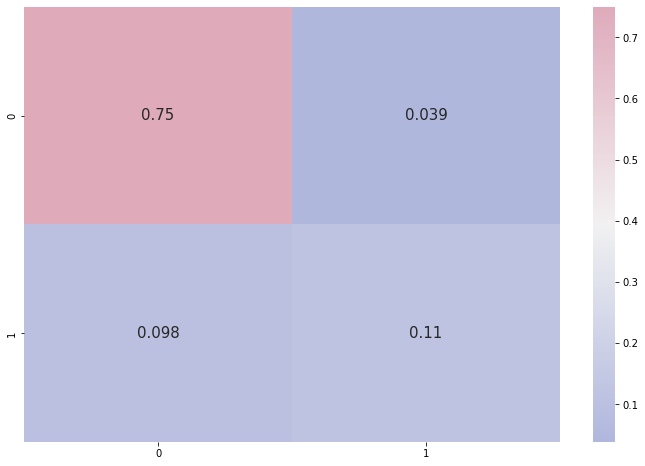

In [69]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [70]:
# save the model to disk
filename = 'models/cat_model.sav'
pickle.dump(rain, open(filename, 'wb'))
pickle.dump(model_t9, open("models/cat_t9_model.sav","wb"))
pickle.dump(model_t3, open("models/cat_t3_model.sav","wb"))
pickle.dump(model_c9, open("models/cat_c9_model.sav","wb"))
pickle.dump(model_c3, open("models/cat_c3_model.sav","wb"))

#load the model from disk
cat_model = pickle.load(open(filename, 'rb'))
result = cat_model.score(X_test, y_test)
print(result)

0.8633369923161361


C:\Users\nkuahe\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


In [73]:
filename_c3pm = "./models/cat_c3_model.sav"
cat_c3 = pickle.load(open(filename_c3pm, 'rb'))
Cloud3pm = cat_c3.predict(features)
#Cloud3pm = round(Cloud3pm,2)
Cloud3pm

array([4.8324268 , 4.9138804 , 4.61018527, ..., 5.01161699, 4.48282642,
       5.11789361])

In [109]:
### function to proccess the data
def encode(data, col, max_val):
        data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
        data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
        return data
        
## function to Process the data

def sample_data_processing(data):
    """ 
    # DATA PREPROCESSING

    **Steps involved in Data Preprocessing:**

    * Label encoding columns with categorical data
    * Perform the scaling of the features
    * Detecting outliers
    * Dropping the outliers based on data analysis"""
    ### Load data
    # DATA VISUALIZATION AND CLEANING
    data = pd.DataFrame(data, index=[0])

    #There don't seem to be any error in dates so parsing values into datetime
    data['Date']= pd.to_datetime(data["Date"])
    #Creating a collumn of year
    data['year'] = data.Date.dt.year

    # function to encode datetime into cyclic parameters. 
    #As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

    data['month'] = data.Date.dt.month
    data = encode(data, 'month', 12)

    data['day'] = data.Date.dt.day
    data = encode(data, 'day', 31)

    # Get list of categorical variables
    s = (data.dtypes == "object")
    object_cols = list(s[s].index)
    print("Categorical variables:")
    print(object_cols)

    # Get list of neumeric variables
    t = (data.dtypes == "float64")
    num_cols = list(t[t].index)

    print("Numeric variables:")
    print(num_cols)
    # Apply label encoder to each column with categorical data
    # Get list of categorical variables
    s = (data.dtypes == "object")
    object_cols = list(s[s].index)
    print("Categorical variables:")
    print(object_cols)

    ### convert categorical values to numerics
    object_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
    ### Location
    city = ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
     'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 
     'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 
     'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 
     'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 
     'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 
     'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 
     'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
    number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 
    23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 
    45, 46, 47, 48]
    cities_numbers = {}
    cities_numbers["City"]=city
    cities_numbers["Numbers"] = number
    data_cities = pd.DataFrame(cities_numbers)
    location = data['Location'].iloc[0]
    print("Location is ",location)
    print("*****************************************************************")
    data['Location'] = data_cities.loc[data_cities["City"]==data["Location"].iloc[0],"Numbers"].iloc[0]

    ### RainToday
    today = data["RainToday"].iloc[0]
    if data["RainToday"].iloc[0] == "No":
        data["RainToday"].iloc[0] = 0
    elif data["RainToday"].iloc[0] == "Yes":
        data["RainToday"].iloc[0] = 1
    else:
        print("Status Failled, Message:The value passed for RainToday {} is incorrrect".format(data["RainToday"])) ### WindGustDir
    windGustDir = data["WindGustDir"].iloc[0]
    number_wind = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]
    WindGustDir_list = ['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW']
    WindGustDir_data = {}
    WindGustDir_data["Numbers"] = number_wind
    WindGustDir_data["WindGustDir"] = WindGustDir_list
    data_WindGustDir = pd.DataFrame(WindGustDir_data)
    data["WindGustDir"] = data_WindGustDir.loc[data_WindGustDir["WindGustDir"]==data["WindGustDir"].iloc[0], "Numbers"].iloc[0]

    ###     9am and 3pm
    WindDir3pm_num = [14, 15,  0,  7, 13, 10,  2,  1,  6, 11, 12,  9,  3,  8,  5,  4]
    WindDir9am_num = [13,  6,  9,  1, 12, 10,  8,  4,  3, 11, 15,  2,  0,  7, 14,  5]
    WindDir3pm_cat = ['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
        'SW', 'SE', 'N', 'S', 'NNE','NE']
    WindDir9am_cat = ['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE','SSW', 'N',
        'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']

    data_WindDir3pm = {}
    data_WindDir3pm["Numbers"] = WindDir3pm_num
    data_WindDir3pm["WindDir3pm"] = WindDir3pm_cat
    data_WindDir3pm = pd.DataFrame(data_WindDir3pm)
    data["WindDir3pm"] = data_WindDir3pm.loc[data_WindDir3pm["WindDir3pm"]==data["WindDir3pm"].iloc[0], "Numbers"].iloc[0]

    data_WindDir9am = {}
    data_WindDir9am["Numbers"] = WindDir9am_num
    data_WindDir9am["WindDir9am"] = WindDir9am_cat
    data_WindDir9am = pd.DataFrame(data_WindDir9am)
    data["WindDir9am"] = data_WindDir9am.loc[data_WindDir9am["WindDir9am"]==data["WindDir9am"].iloc[0], "Numbers"].iloc[0]

    # Prepairing attributes of scale data

    features = data.drop(['Date','day', 'month'], axis=1) # dropping target and extra columns

    """#Set up a standard scaler for the features
    col_names = list(features.columns)
    s_scaler = preprocessing.StandardScaler()
    features = s_scaler.fit_transform(features)
    features = pd.DataFrame(features, columns=col_names)""" 

    return features

In [110]:
sample_data = {
    "Date": "2022-12-31",
    "Location": "Wollongong",
    "MinTemp": "1.2",
    "MaxTemp": "20.8",
    "Rainfall": "0.0",
    "Evaporation": "0.2",
    "Sunshine": "13.2",
    "WindGustDir": "ESE",
    "WindGustSpeed": "44.0",
    "WindDir9am": "W",
    "WindDir3pm": "WNW",
    "WindSpeed9am": "20.0",
    "WindSpeed3pm": "24",
    "Humidity9am": "71",
    "Humidity3pm": "22",
    "Pressure9am": "1007.7",
    "Pressure3pm": "1007.1",
    "Cloud9am": "8.0",
    "Cloud3pm": "2.0",
    "Temp9am": "16.9",
    "Temp3pm": "21.8",
    "RainToday": "No"
    }


In [111]:
data_1 = sample_data_processing(sample_data)

Categorical variables:
['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Numeric variables:
['month_sin', 'month_cos', 'day_sin', 'day_cos']
Categorical variables:
['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Location is  Wollongong
*****************************************************************


C:\Users\nkuahe\AppData\Local\Temp\ipykernel_21840\1092690859.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RainToday"].iloc[0] = 0


In [112]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1 non-null      int64  
 1   MinTemp        1 non-null      object 
 2   MaxTemp        1 non-null      object 
 3   Rainfall       1 non-null      object 
 4   Evaporation    1 non-null      object 
 5   Sunshine       1 non-null      object 
 6   WindGustDir    1 non-null      int64  
 7   WindGustSpeed  1 non-null      object 
 8   WindDir9am     1 non-null      int64  
 9   WindDir3pm     1 non-null      int64  
 10  WindSpeed9am   1 non-null      object 
 11  WindSpeed3pm   1 non-null      object 
 12  Humidity9am    1 non-null      object 
 13  Humidity3pm    1 non-null      object 
 14  Pressure9am    1 non-null      object 
 15  Pressure3pm    1 non-null      object 
 16  Cloud9am       1 non-null      object 
 17  Cloud3pm       1 non-null      object 
 18  Temp9am       

In [113]:
data_1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month_sin,month_cos,day_sin,day_cos
0,47,1.2,20.8,0.0,0.2,13.2,2,44.0,13,14,20.0,24,71,22,1007.7,1007.1,8.0,2.0,16.9,21.8,0,2022,-2.449294e-16,1.0,-2.449294e-16,1.0


In [87]:
data_1 = data_1.astype(float)
Cloud9am_data = data_1.drop(["Cloud9am"],axis=1)
Cloud3pm_data = data_1.drop(["Cloud3pm"],axis=1)
Temp3pm_data = data_1.drop(["Temp3pm"],axis=1)
Temp9am_data = data_1.drop(["Temp9am"],axis=1)

In [72]:
Cloud3pm_data.shape, Temp3pm_data.shape

((1, 25), (1, 25))

In [89]:
filename_c3pm = "./models/cat_c3_model.sav"
cat_model = pickle.load(open(filename_c3pm, 'rb'))
result = cat_model.predict(Cloud3pm_data)
round(result[0],2)
#result

5.06

In [95]:
"""filename_rain = "./models/cat_model.sav"
filename_c3pm = "./models/cat_c3_model.sav"
filename_c9am = "./models/cat_c9_model.sav"
filename_t9am = "./models/cat_t9_model.sav"
filename_t3pm = "./models/cat_t3_model.sav"
"""
### drop the Cloud9am column
xgb_c9 = pickle.load(open(filename_c9am, 'rb'))
Cloud9am = xgb_c9.predict(Cloud9am_data)
Cloud9am = round(Cloud9am[0],2)
print("Cloud9am is ",Cloud9am)

### drop the Temp3pm column
xgb_t3 = pickle.load(open(filename_t3pm, 'rb'))
Temp3pm = xgb_t3.predict(Temp3pm_data)
Temp3pm = round(Temp3pm[0],2)
print("Temp at 3pm is ",Temp3pm)

### drop the Temp9am column
xgb_t9 = pickle.load(open(filename_t9am, 'rb'))
Temp9am = xgb_t9.predict(Temp9am_data)
Temp9am = round(Temp9am[0],2)
print("Temp at 9am is ", Temp9am)

xgb_c3 = pickle.load(open(filename_c3pm, 'rb'))
result = xgb_c3.predict(Cloud3pm_data)
print("Cloud 3pm",round(result[0],2))
#result

Cloud9am is  6.21
Temp at 3pm is  6.21
Temp at 9am is  6.21
Cloud 3pm 6.21


In [ ]:
cat_model.predict(sample)

# LIGHTGBM

In [140]:
light = LGBMClassifier()
light.fit(X_train,y_train)
predicted = light.predict(X_test)
print ("The accuracy of Lightgbm classifier is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Lightgmb is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Lightgbm classifier is :  85.6711619883958 %

F1 score for Lightgmb is : 60.55897269882379 %


In [141]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     20110
           1       0.73      0.52      0.61      5398

    accuracy                           0.86     25508
   macro avg       0.80      0.73      0.76     25508
weighted avg       0.85      0.86      0.85     25508



<AxesSubplot:>

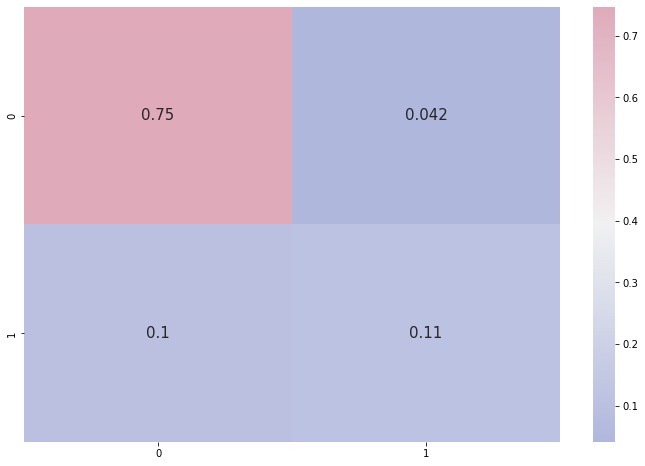

In [142]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [143]:
# save the model to disk
filename = 'models/light_model.sav'
pickle.dump(light, open(filename, 'wb'))
#load the model from disk
light_model = pickle.load(open(filename, 'rb'))
result = light_model.score(X_test, y_test)
print(result)

0.8567116198839579


In [144]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

C:\Users\nkuahe\Anaconda3\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/150
2551/2551 [==============================] - 14s 5ms/step - loss: 0.4756 - accuracy: 0.7841 - val_loss: 0.3932 - val_accuracy: 0.7860
Epoch 2/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.4125 - accuracy: 0.7842 - val_loss: 0.3871 - val_accuracy: 0.7860
Epoch 3/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.4092 - accuracy: 0.7842 - val_loss: 0.3846 - val_accuracy: 0.7860
Epoch 4/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.4042 - accuracy: 0.7842 - val_loss: 0.3827 - val_accuracy: 0.7860
Epoch 5/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.4053 - accuracy: 0.7913 - val_loss: 0.3810 - val_accuracy: 0.8386
Epoch 6/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.4046 - accuracy: 0.8374 - val_loss: 0.3799 - val_accuracy: 0.8391
Epoch 7/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.4034 - accuracy: 0.8384 - val_loss: 0.3792 - val_a

2551/2551 [==============================] - 5s 2ms/step - loss: 0.3755 - accuracy: 0.8184 - val_loss: 0.3551 - val_accuracy: 0.8480
Epoch 114/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3769 - accuracy: 0.8175 - val_loss: 0.3553 - val_accuracy: 0.8475
Epoch 115/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3754 - accuracy: 0.8175 - val_loss: 0.3551 - val_accuracy: 0.8472
Epoch 116/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3767 - accuracy: 0.8186 - val_loss: 0.3544 - val_accuracy: 0.8476
Epoch 117/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3759 - accuracy: 0.8175 - val_loss: 0.3546 - val_accuracy: 0.8482
Epoch 118/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3758 - accuracy: 0.8185 - val_loss: 0.3545 - val_accuracy: 0.8484
Epoch 119/150
2551/2551 [==============================] - 5s 2ms/step - loss: 0.3756 - accuracy: 0.8176 - val_loss: 0.3545 - val_ac

Plotting training and validation loss over epochs

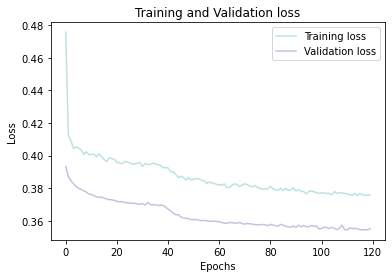

In [145]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

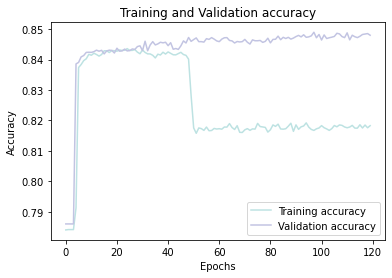

In [146]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id="6"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>CONCLUSION</center></h2> 
 
# CONCLUSIONS


**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [147]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 [==============================] - 1s 1ms/step


<AxesSubplot:>

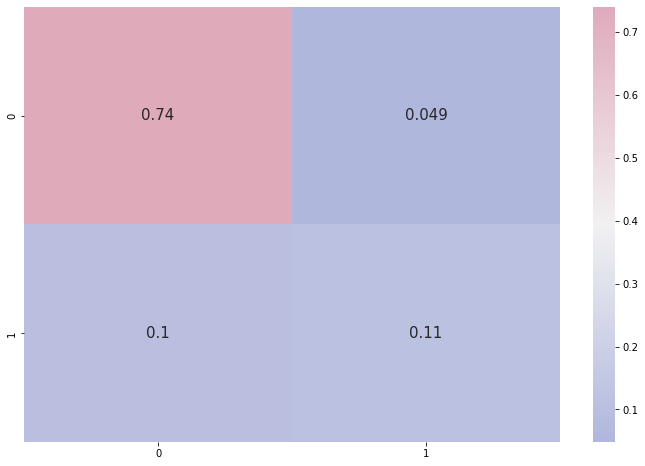

In [148]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     20110
           1       0.69      0.52      0.60      5398

    accuracy                           0.85     25508
   macro avg       0.79      0.73      0.75     25508
weighted avg       0.84      0.85      0.84     25508

